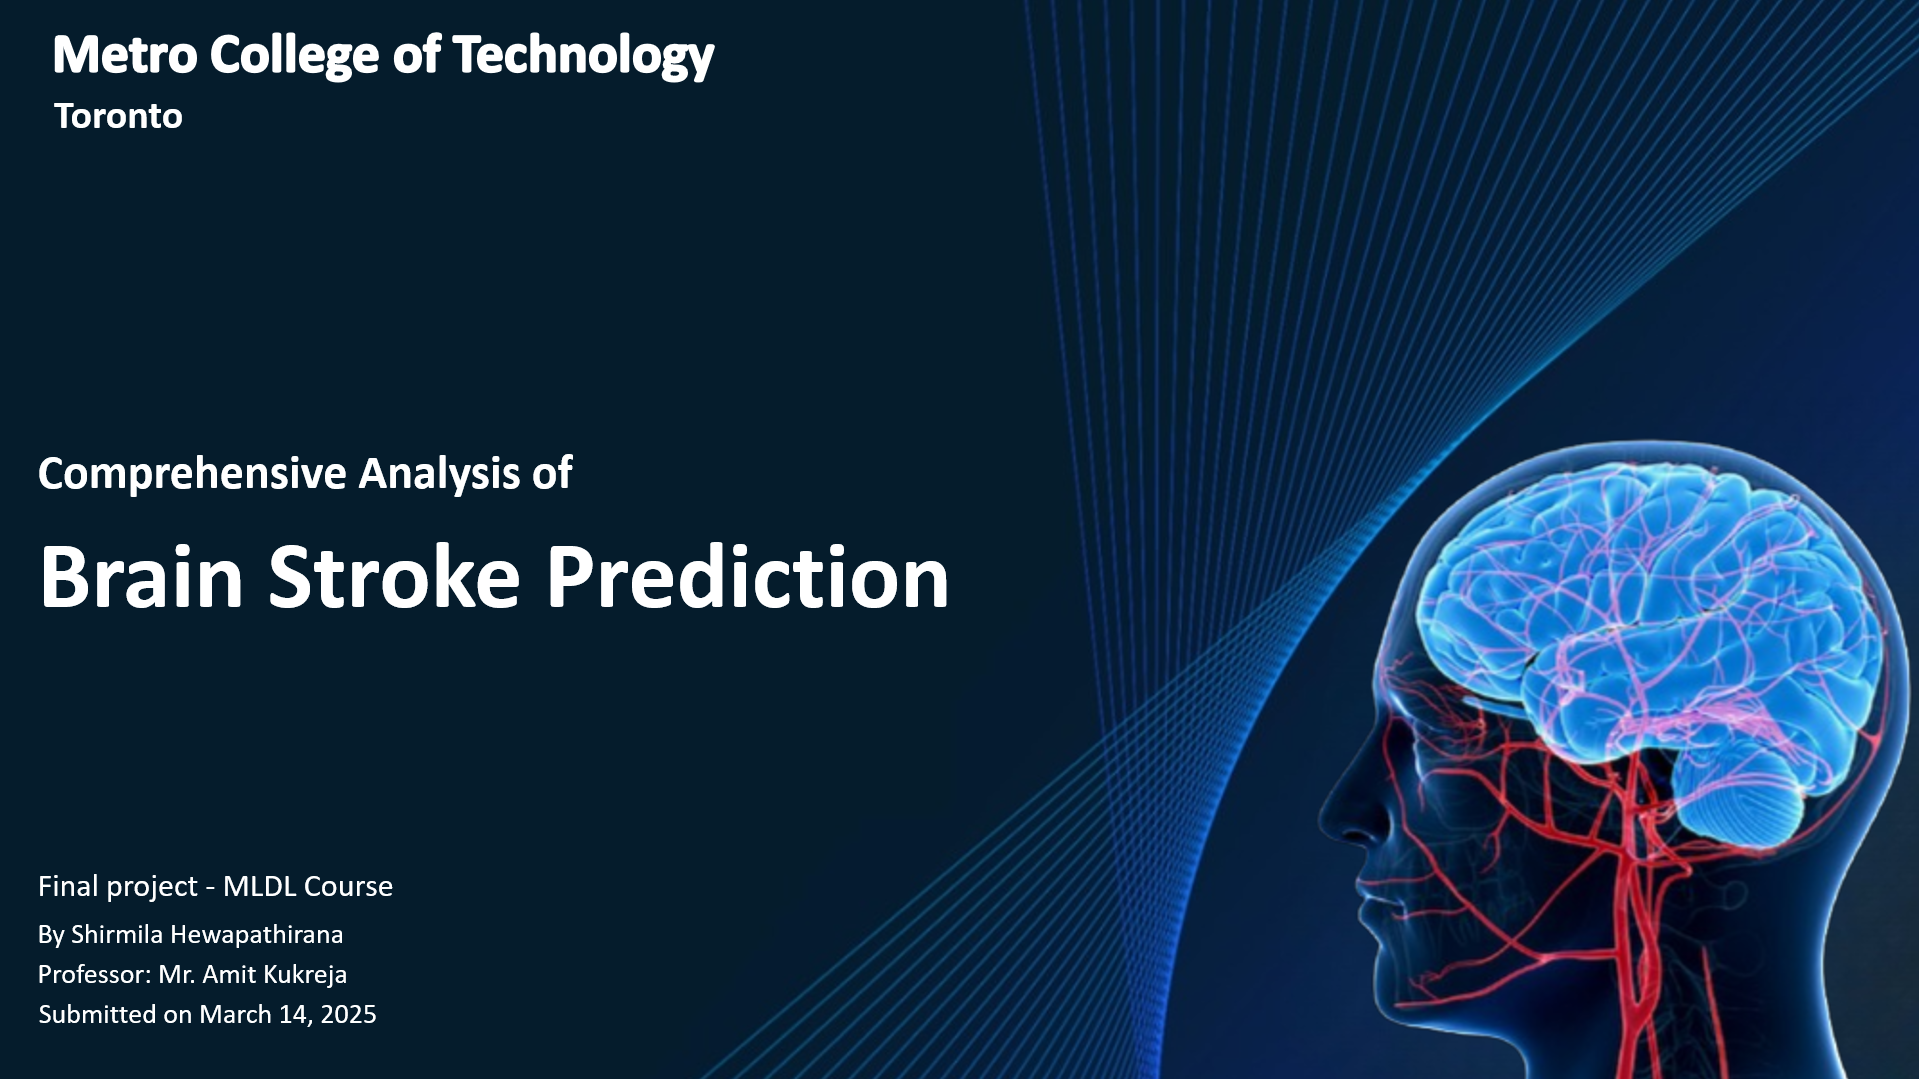

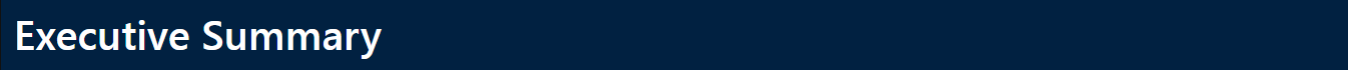

## What is a stroke?

A stroke is a medical condition in which poor blood flow to the brain causes cell death. The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation. This dataset containing data about the poaple if there have stroke or not and some information about their health and social status.

### Exploratory Data Analysis

For this project, I utilized the Brain Stroke Prediction dataset sourced from Kaggle (available under the same name in their datasets section). 

This dataset encompasses a range of relevant features including gender, age, hypertension status, heart disease history, marital status, work type, residence type, average glucose level, BMI, and smoking status.  Prior to model development, 

I conducted essential data preprocessing. This involved addressing missing values, transforming categorical variables into a suitable numerical format, and standardizing numerical features. These steps were crucial to ensure the dataset was well-prepared for robust predictive modeling.  

Further details on these data preparation procedures can be found within the comments in the code. With the data prepped, we can now proceed to the model building phase.

#### Understanding the Variables

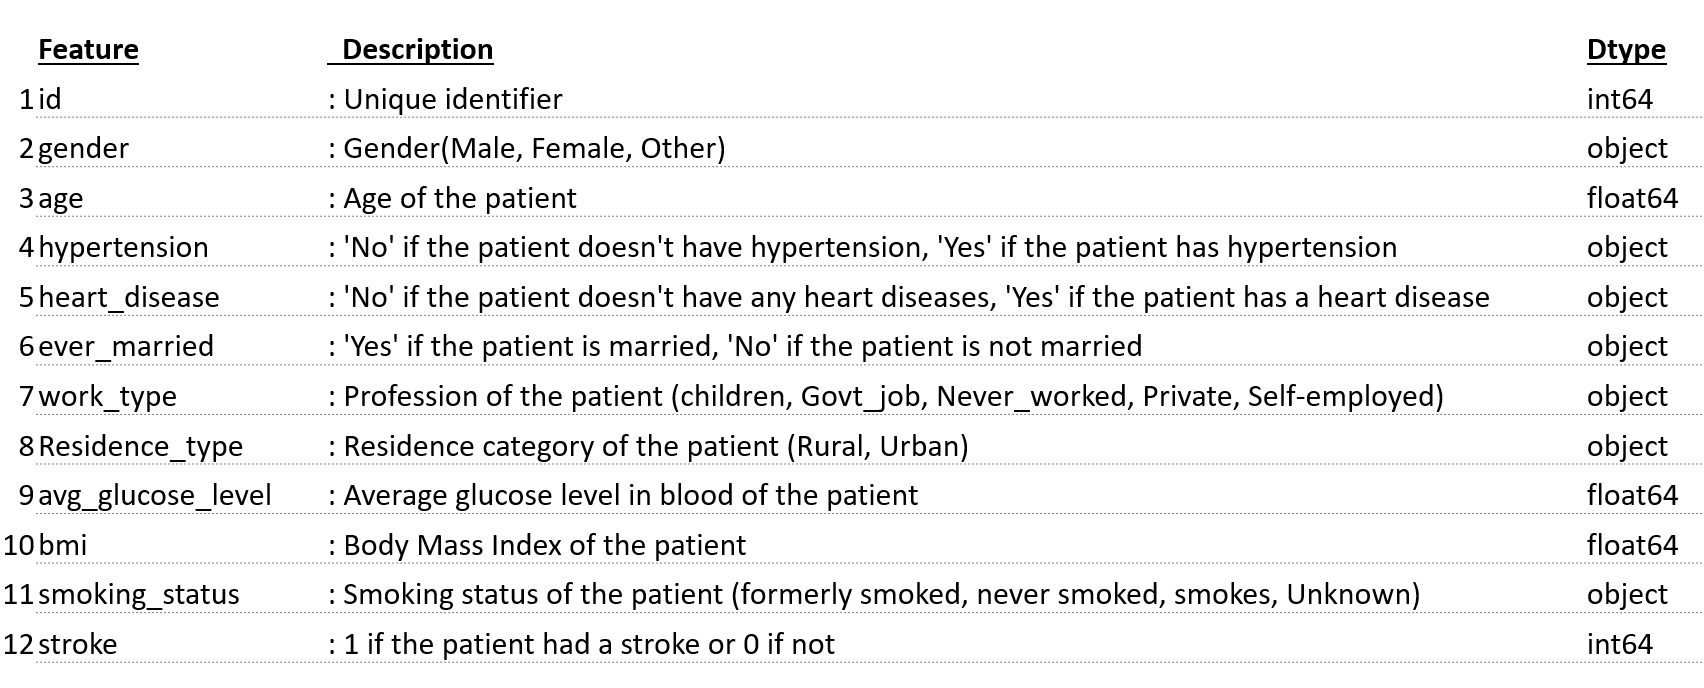

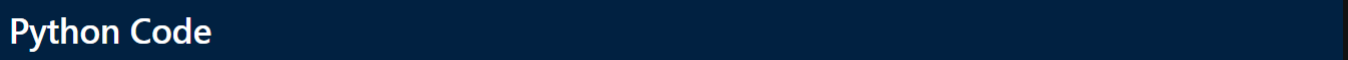

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency, pearsonr, ttest_ind, mannwhitneyu, f_oneway, shapiro, levene, bartlett, kruskal

warnings.filterwarnings('ignore')
# plt.style.use('seaborn-v0_8-whitegrid')

#### 1.	Import the dataset: Load the data into your analysis environment.

In [2]:
import pandas as pd
df = pd.read_csv('BrainStroke.csv') 

In [3]:
df.shape

(5110, 12)

#### 2.	Display records: Show the first 5 and last 5 records of the dataset.

In [4]:
df.head(5)

id  gender   age hypertension heart_disease ever_married      work_type  \
0   9046    Male  67.0           No           Yes          Yes        Private   
1  51676  Female  61.0           No            No          Yes  Self-employed   
2  31112    Male  80.0           No           Yes          Yes        Private   
3  60182  Female  49.0           No            No          Yes        Private   
4   1665  Female  79.0          Yes            No          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

In [5]:
df.tail(5)

id  gender   age hypertension heart_disease ever_married  \
5105  18234  Female  80.0          Yes            No          Yes   
5106  44873  Female  81.0           No            No          Yes   
5107  19723  Female  35.0           No            No          Yes   
5108  37544    Male  51.0           No            No          Yes   
5109  44679  Female  44.0           No            No          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

#### 3.	Identify data types: Check and note the data types for each variable.

In [6]:
# df.dtypes
df.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
# feature levels/frequency
for col in df.columns:
    print("="*40)
    print(df[col].value_counts())

id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64
hypertension
No     4612
Yes     498
Name: count, dtype: int64
heart_disease
No     4834
Yes     276
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Leng

In [8]:
# explore data to decide datatypes
# df.nunique()
# df.astype('object').describe().T
df.describe().T

count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     33.10     97.60  
stroke                 0.000      0.00      1.00

In [9]:
# drop 'id' teature as it is not important to the analysis
df=df.drop('id', axis=1)

In [11]:
df.describe(include='object')

gender hypertension heart_disease ever_married work_type  \
count     5110         5110          5110         5110      5110   
unique       3            2             2            2         5   
top     Female           No            No          Yes   Private   
freq      2994         4612          4834         3353      2925   

       Residence_type smoking_status  
count            5110           5110  
unique              2              4  
top             Urban   never smoked  
freq             2596           1892

In [12]:
# check what are the levels of gender and wwork_type
print(f'Feature levels/frequency:')
print(df['gender'].value_counts())

print()
print(df['work_type'].value_counts())

Feature levels/frequency:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


'Other' level in 'gender' feature and 'Never_worked' level in 'work_type' feature are having less frequency. Hence, those are not important for the analysis. Hence, I can drop them from df.

In [13]:
# drop unimportant leves from features
df = df[(df['gender'] != 'Other') & (df['work_type'] != 'Never_worked')]

# Verify the result
print(f'Feature levels/frequency:')
print(df['gender'].value_counts())

print()
print(df['work_type'].value_counts())

Feature levels/frequency:
gender
Female    2983
Male      2104
Name: count, dtype: int64

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Name: count, dtype: int64


In [14]:
df.describe().T

count        mean        std    min     25%    50%  \
age                5087.0   43.346963  22.591698   0.08  26.000  45.00   
avg_glucose_level  5087.0  106.184069  45.340478  55.12  77.235  91.89   
bmi                4886.0   28.909640   7.853621  10.30  23.600  28.10   
stroke             5087.0    0.048948   0.215781   0.00   0.000   0.00   

                      75%     max  
age                 61.00   82.00  
avg_glucose_level  114.09  271.74  
bmi                 33.10   97.60  
stroke               0.00    1.00

it is observed that bmi is having missing values

#### 4.	Missing entries: Determine the number of missing entries per variable.

In [252]:
print('Missing values:')
# df.isnull().sum().sum()
df.isnull().sum()

Missing values:


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

since I have enough data I chose to drop rows with 201 nos of missing values in the 'bmi' feature

In [253]:
df= df.dropna(subset=['bmi'])
# Verify the result
print(df.isnull().sum())
df.describe().T

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


count        mean        std    min      25%    50%  \
age                4886.0   42.988973  22.534968   0.08  25.0000  45.00   
avg_glucose_level  4886.0  105.339073  44.481347  55.12  77.0625  91.68   
bmi                4886.0   28.909640   7.853621  10.30  23.6000  28.10   
stroke             4886.0    0.042775   0.202371   0.00   0.0000   0.00   

                       75%     max  
age                 60.000   82.00  
avg_glucose_level  113.545  271.74  
bmi                 33.100   97.60  
stroke               0.000    1.00

#### 5.	Duplicate records: Identify and count any duplicate records.

In [254]:
df.duplicated().sum()

0

I do not have any duplicates in this data set. 

In [255]:
# But if I had, I would have removed duplicates with below code.
df.drop_duplicates(inplace=True)

#### 6.	Univariate analysis: Conduct this analysis on all variables, creating appropriate visualizations.

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4886 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4886 non-null   object 
 1   age                4886 non-null   float64
 2   hypertension       4886 non-null   object 
 3   heart_disease      4886 non-null   object 
 4   ever_married       4886 non-null   object 
 5   work_type          4886 non-null   object 
 6   Residence_type     4886 non-null   object 
 7   avg_glucose_level  4886 non-null   float64
 8   bmi                4886 non-null   float64
 9   smoking_status     4886 non-null   object 
 10  stroke             4886 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 458.1+ KB


In [257]:
num_features = ['age', 'bmi', 'avg_glucose_level']

cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                'Residence_type', 'stroke', 'smoking_status', 'work_type']

print(f'Numerical features: \n{num_features}')
print(f'\nCategorical features: \n{cat_features}')

Numerical features: 
['age', 'bmi', 'avg_glucose_level']

Categorical features: 
['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke', 'smoking_status', 'work_type']


### UNIVARIATE ANALYSIS FOR CATEGORICAL FEATURES

Value counts for gender:

gender          Female    Male
Count           2886.0  2000.0
Percentage (%)    59.1    40.9


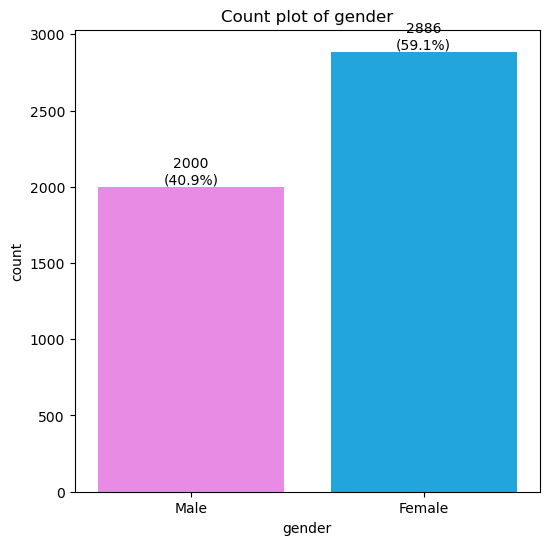



Value counts for hypertension:

hypertension        No    Yes
Count           4435.0  451.0
Percentage (%)    90.8    9.2


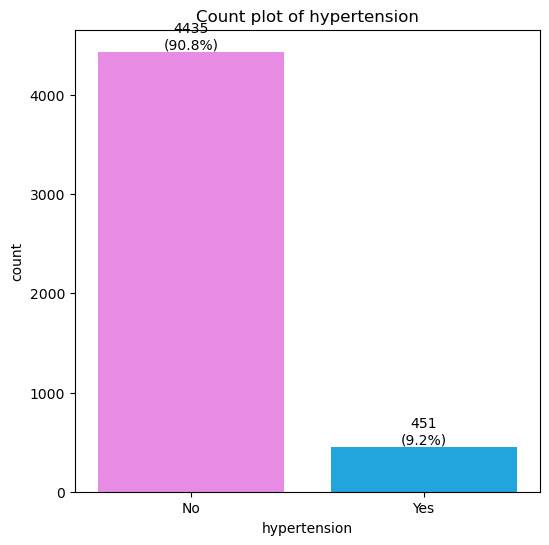



Value counts for heart_disease:

heart_disease       No    Yes
Count           4643.0  243.0
Percentage (%)    95.0    5.0


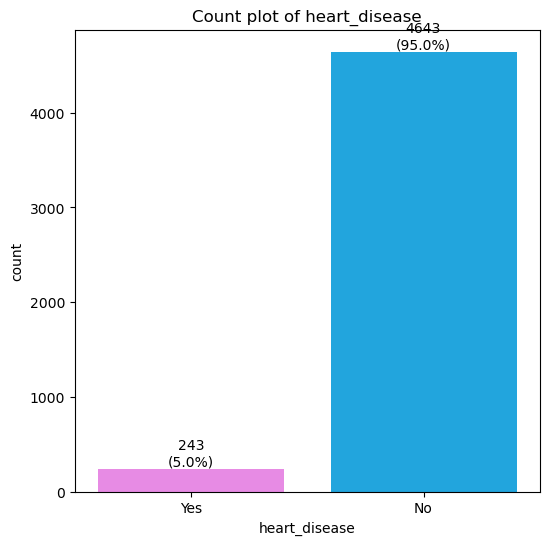



Value counts for ever_married:

ever_married       Yes      No
Count           3204.0  1682.0
Percentage (%)    65.6    34.4


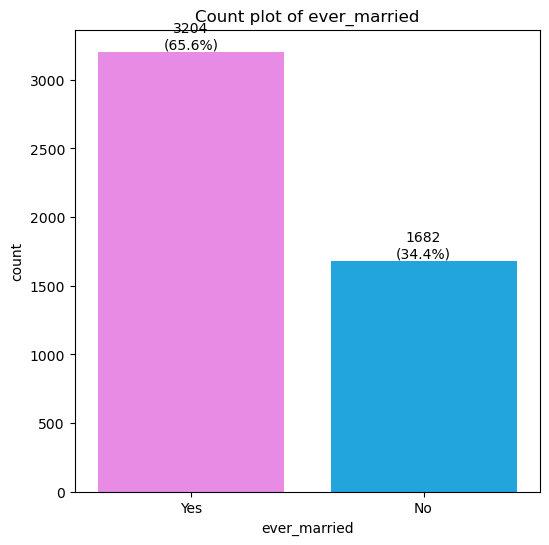



Value counts for Residence_type:

Residence_type   Urban   Rural
Count           2475.0  2411.0
Percentage (%)    50.7    49.3


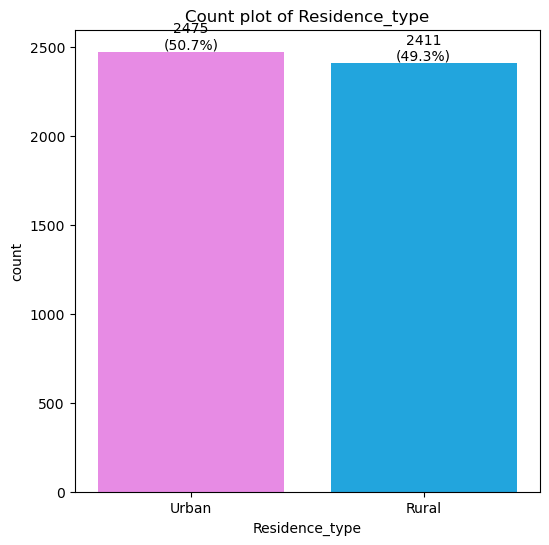



Value counts for stroke:

stroke               0      1
Count           4677.0  209.0
Percentage (%)    95.7    4.3


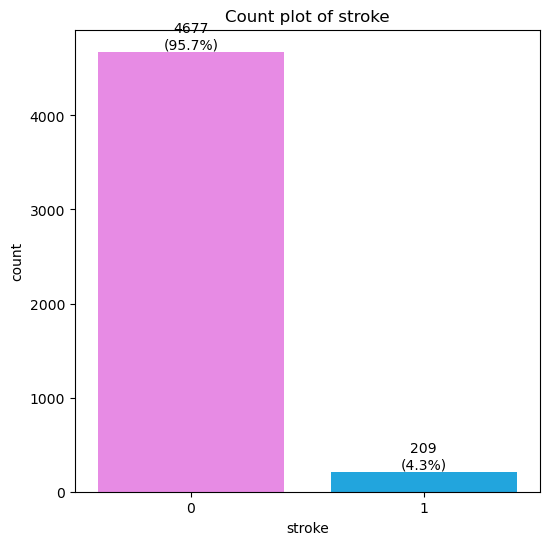



Value counts for smoking_status:

smoking_status  never smoked  Unknown  formerly smoked  smokes
Count                 1838.0   1475.0            836.0   737.0
Percentage (%)          37.6     30.2             17.1    15.1


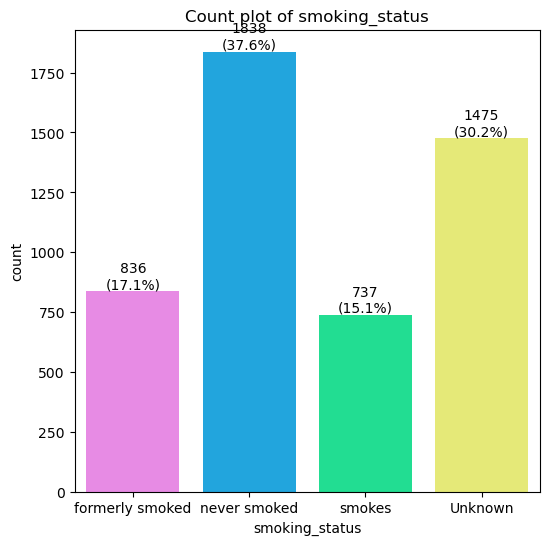



Value counts for work_type:

work_type       Private  Self-employed  children  Govt_job
Count            2810.0          775.0     671.0     630.0
Percentage (%)     57.5           15.9      13.7      12.9


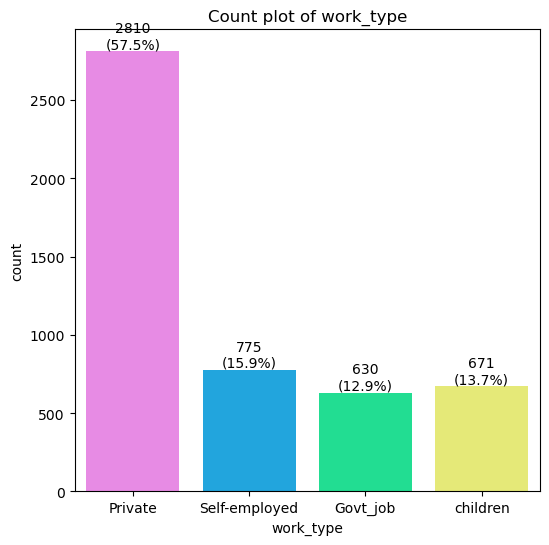

In [258]:
# Loop through each categorical feature  to get frequency table and draw the plot  
for feature in df[cat_features]:
    print(f"Value counts for {feature}:\n")
    result = pd.concat([df[feature].value_counts().sort_values(ascending=False),
                        df[feature].value_counts(normalize=True).round(3) * 100], axis=1)
    result.columns = ['Count', 'Percentage (%)'] 
    print(result.T) 

    # Add count plot for each feature with bar values
    plt.figure(figsize=(6, 6))
    ax = sns.countplot(x=df[feature], palette=['#F67CF2', '#03B1FC', '#03fc98', '#f7fc65'])
    plt.title(f'Count plot of {feature}')

    # Add values (count and percentage) on top of each bar
    for bar in ax.patches:
        count = int(bar.get_height())  # Get count
        percentage = (count / len(df)) * 100  # Calculate percentage
        ax.annotate(f'{count}\n({percentage:.1f}%)',  # Display count and percentage
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='bottom', fontsize=10)
    ax.set_ylim(0, ax.get_ylim()[1] * 1.03)  # Add 3% extra space above the tallest bar
    plt.show()
    print("\n")

### UNIVARIATE ANALYSIS FOR NUMERICAL FEATURES

In [20]:
def plots(feature):
    plt.figure(figsize=(13.5, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=40, color='#03b1fc', kde=True)
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12, color='#012141')
    plt.ylabel('Count', fontsize=12, color='#012141')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[feature], color='#03b1fc')
    plt.title(f'Boxplot of {feature}', fontsize=16)
    plt.ylabel(feature, fontsize=12, color='#012141')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()


FREQUENCY TABLE - 'age'

In [21]:
print(f'FREQUENCY TABLE - AGE:')
pd.concat([df['age'].value_counts().sort_values(ascending=False), df['age'].value_counts(normalize=True).round(3)*100], axis = 1).T

FREQUENCY TABLE - AGE:


age         78.00  57.00  52.00  54.00  55.00  51.00  53.00  45.00  50.00  \
count        93.0   93.0   85.0   84.0   83.0   83.0   83.0   82.0   81.0   
proportion    1.9    1.9    1.7    1.7    1.7    1.7    1.7    1.7    1.7   

age         79.00  ...  0.56   1.56   0.80   1.16   0.64   1.40   0.16   \
count        77.0  ...    5.0    4.0    4.0    4.0    4.0    3.0    3.0   
proportion    1.6  ...    0.1    0.1    0.1    0.1    0.1    0.1    0.1   

age         0.40   0.08   0.48   
count         2.0    2.0    2.0  
proportion    0.0    0.0    0.0  

[2 rows x 104 columns]

VISUALIZATION - 'age'

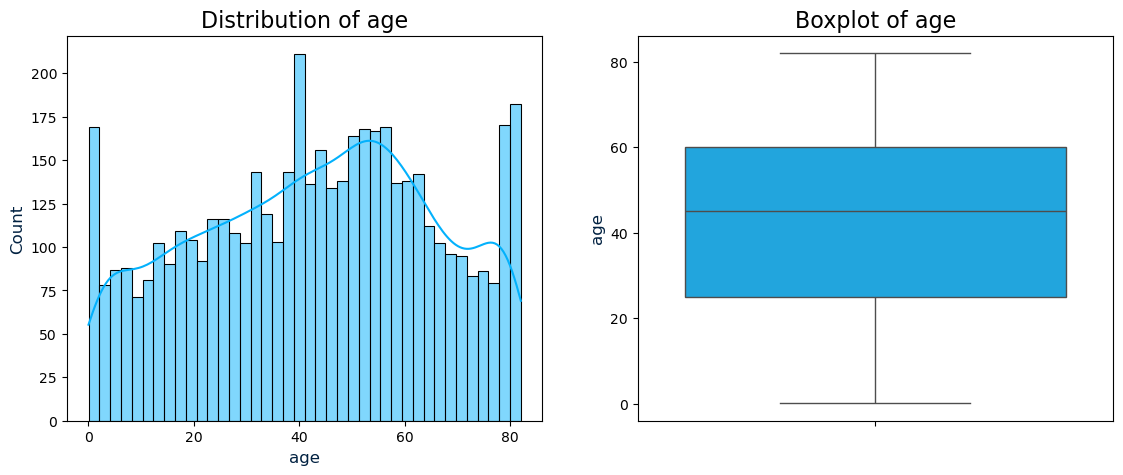

In [22]:
plots('age')

FREQUENCY TABLE - 'ave_glucose_level'

In [268]:
# frequency table for 'avg_glucose_level'
print(f'FREQUENCY TABLE - AVE_GLUCOSE_LEVEL:')
pd.concat([df['avg_glucose_level'].value_counts().sort_values(ascending=False), df['avg_glucose_level'].value_counts(normalize=True).round(3)*100], axis = 1).T

FREQUENCY TABLE - AVE_GLUCOSE_LEVEL:


avg_glucose_level  93.88   83.16   91.68   73.00   91.85   72.49   80.72   \
count                 6.0     5.0     5.0     5.0     5.0     5.0     4.0   
proportion            0.1     0.1     0.1     0.1     0.1     0.1     0.1   

avg_glucose_level  67.92   93.55   89.68   ...  99.94   106.95  69.74   \
count                 4.0     4.0     4.0  ...     1.0     1.0     1.0   
proportion            0.1     0.1     0.1  ...     0.0     0.0     0.0   

avg_glucose_level  122.73  65.44   79.84   112.11  92.35   69.50   85.28   
count                 1.0     1.0     1.0     1.0     1.0     1.0     1.0  
proportion            0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[2 rows x 3839 columns]

VISUALIZATION - 'ave_glucose_level'

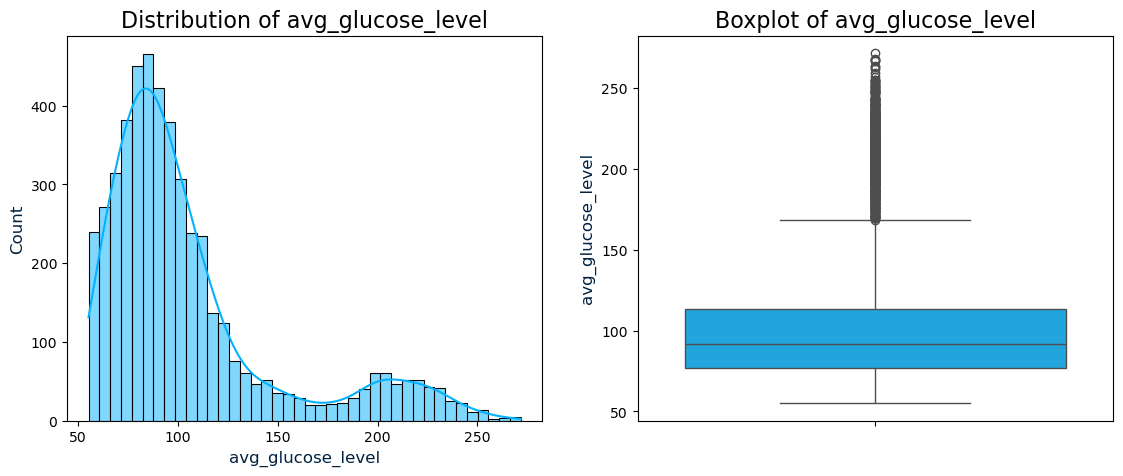

In [24]:
plots('avg_glucose_level')

FREQUENCY TABLE - 'bmi'

In [25]:
print(f'FREQUENCY TABLE - BMI:')
pd.concat([df['bmi'].value_counts().sort_values(ascending=False), df['bmi'].value_counts(normalize=True).round(3)*100], axis = 1).T

FREQUENCY TABLE - BMI:


bmi         28.7  27.6  26.1  26.7  27.7  28.4  27.3  27.0  23.4  26.9  ...  \
count       41.0  37.0  37.0  37.0  37.0  37.0  36.0  35.0  35.0  34.0  ...   
proportion   0.8   0.8   0.8   0.8   0.8   0.8   0.7   0.7   0.7   0.7  ...   

bmi         47.9  13.0  61.2  50.9  64.4  92.0  50.8  57.9  45.8  14.9  
count        1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
proportion   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[2 rows x 418 columns]

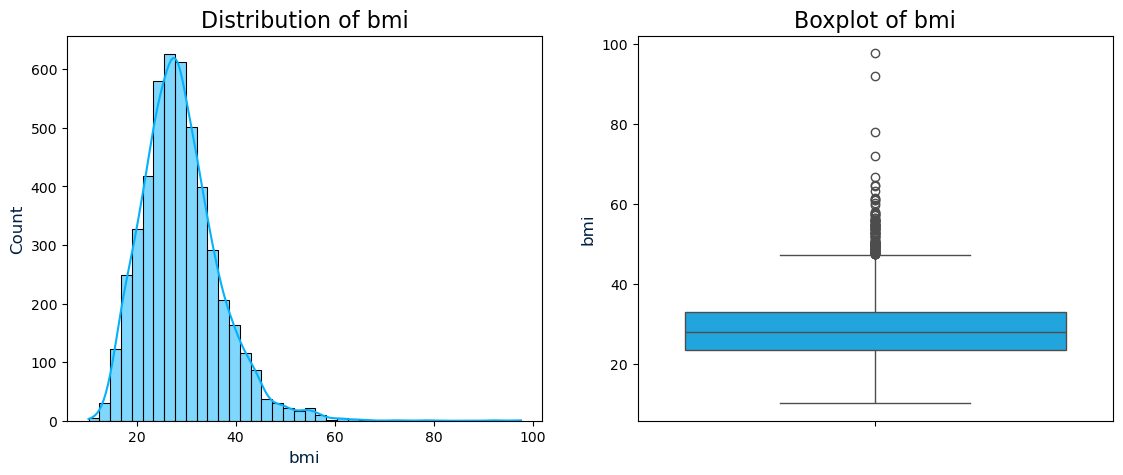

In [26]:
plots('bmi')

In [27]:
# work_type
work_type_ = pd.concat([df['work_type'].value_counts(), df['work_type'].value_counts(normalize=True).round(3)*100], axis = 1).T
work_type_

work_type   Private  Self-employed  children  Govt_job
count        2810.0          775.0     671.0     630.0
proportion     57.5           15.9      13.7      12.9

#### Visualization_1 - Pie Chart

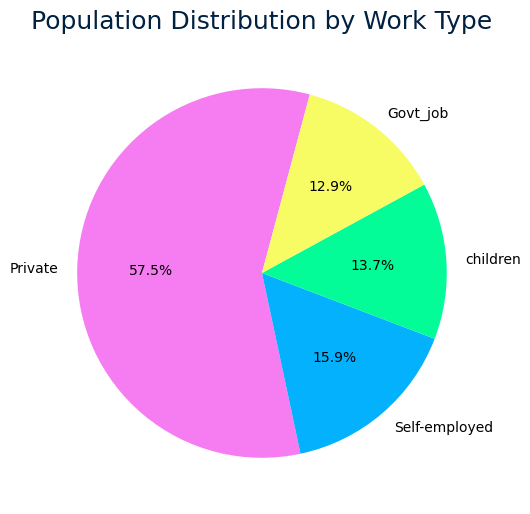

In [260]:
# work_type
plt.figure(figsize=(7, 6))
df.work_type.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', startangle=75, colors=['#F67CF2', '#03B1FC', '#03fc98', '#f7fc65']) #,labels=['', '', '', '']
plt.title("Population Distribution by Work Type", fontsize = 18, color = '#012141', pad = 10)
plt.ylabel('')
plt.show()

#### Visualization_2 - Bar Chart

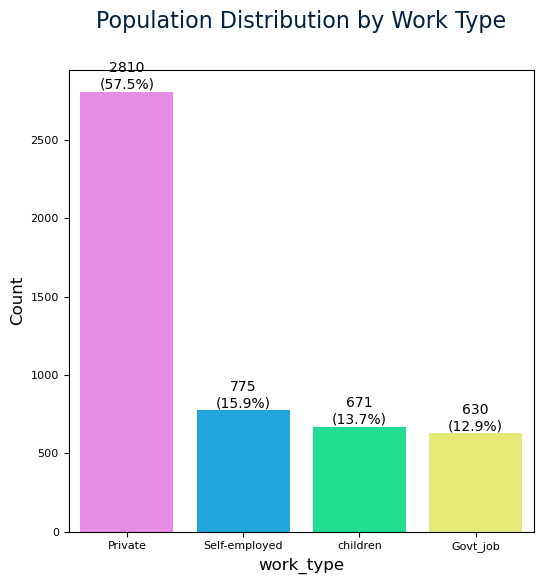

In [265]:
# work_type
s = df['work_type'].value_counts()

fig, ax = plt.subplots(1,1, figsize = (6,6))

bar_colors = ['#F67CF2', '#03B1FC', '#03fc98', '#f7fc65']
barplot_df = pd.DataFrame({'cat': s.index, 'val': s.values})
barplot = sns.barplot(x='cat', y='val', hue = s.index, data=barplot_df, palette=bar_colors)

# for container in barplot.containers:
#     barplot.bar_label(container, fmt='%.0f', fontsize=10, color='#012141')

for bar in ax.patches:
        count = int(bar.get_height())  # Get count
        percentage = (count / len(df)) * 100  # Calculate percentage
        ax.annotate(f'{count}\n({percentage:.1f}%)',  # Display count and percentage
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='bottom', fontsize=10)



plt.title('Population Distribution by Work Type', fontsize = 16, color = '#012141', pad = 30)
plt.ylabel('Count', fontsize = 12, color = 'black') #
plt.xlabel('work_type', fontsize = 12, color = 'black') 
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

#### 7.	Outlier detection: 
Use the Local Outlier Factor (LoF) method to identify outliers. Refer this link for LoF method 

<Axes: ylabel='bmi'>

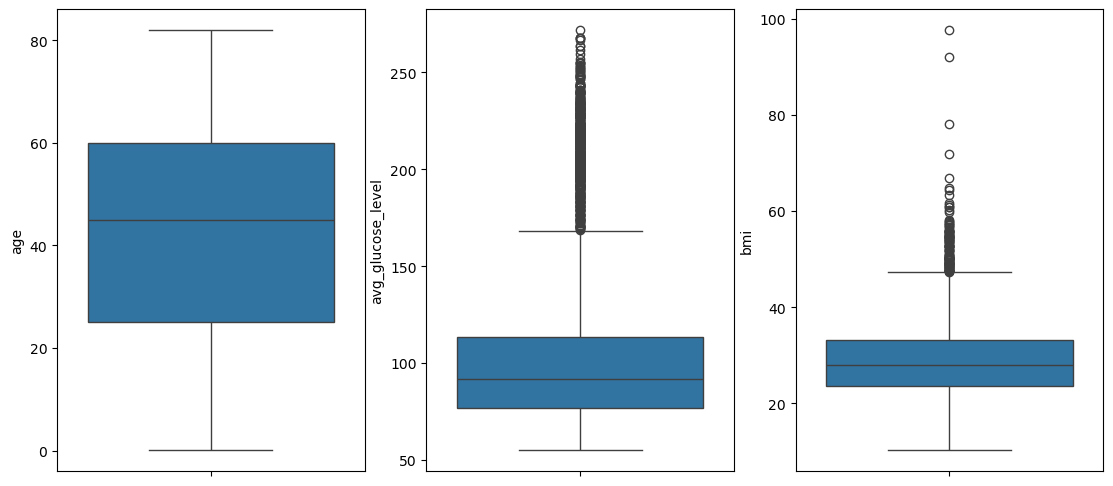

In [266]:
# Visual check
fig, ax = plt.subplots(1,3, figsize = (13.5,6))
sns.boxplot(df.age, ax=ax[0])
sns.boxplot(df.avg_glucose_level, ax=ax[1])
sns.boxplot(df.bmi, ax=ax[2])

In [269]:
from sklearn.neighbors import LocalOutlierFactor

# initialization
lof = LocalOutlierFactor(n_neighbors=30, contamination='auto', n_jobs=-1)

# prediction
df['lof_outlier'] = lof.fit_predict(df[num_features])

# outlier mapping: map -1 (outlier) to 1 and 1 (inlier) to 0
# df['lof_outlier'] = df['lof_outlier'].map({-1: 1, 1: 0})

# Display the relevant columns with outlier information
print("Relevant columns with outlier information:")
print(num_features)

# Count Outliers and Inliers
num_outliers = (df['lof_outlier']==-1).sum()
num_inliers = (df['lof_outlier'] == 1).sum()
print(f"Number of outliers: {num_outliers}")
print(f"Number of inliers: {num_inliers}")

Relevant columns with outlier information:
['age', 'bmi', 'avg_glucose_level']
Number of outliers: 42
Number of inliers: 4844


In [270]:
df['lof_outlier'].value_counts()

lof_outlier
 1    4844
-1      42
Name: count, dtype: int64

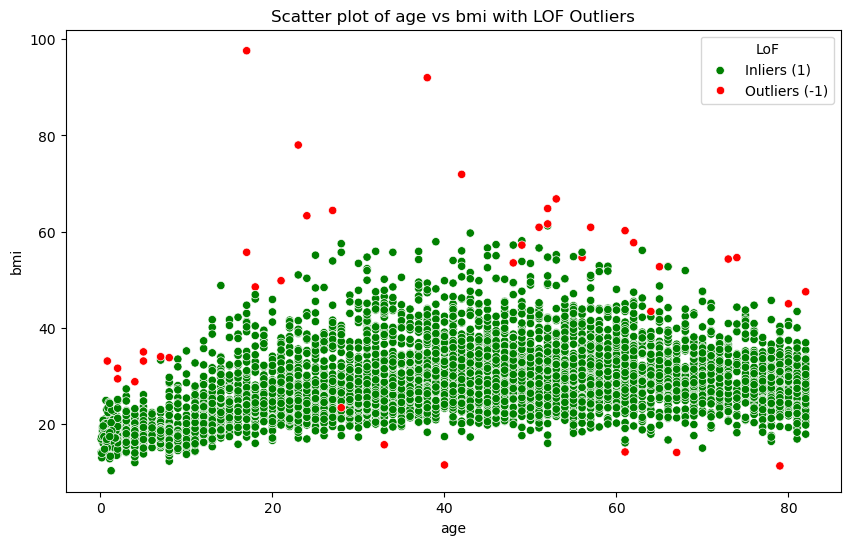

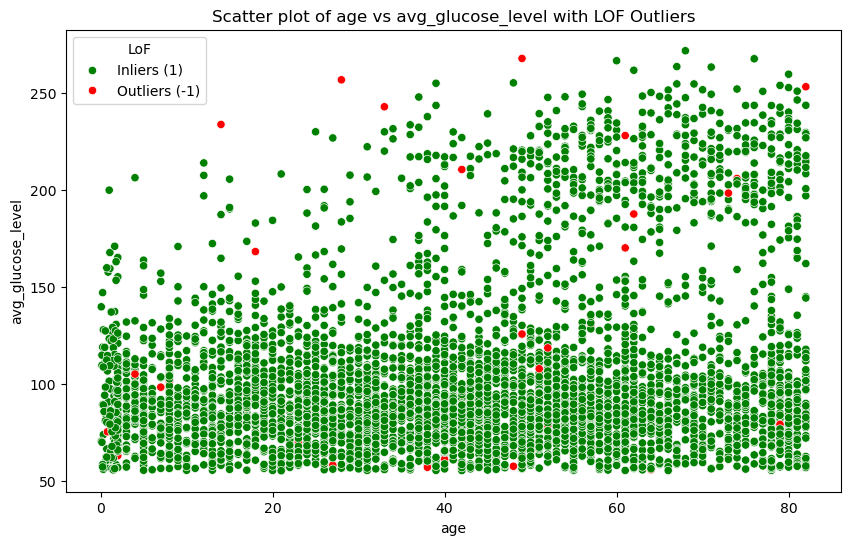

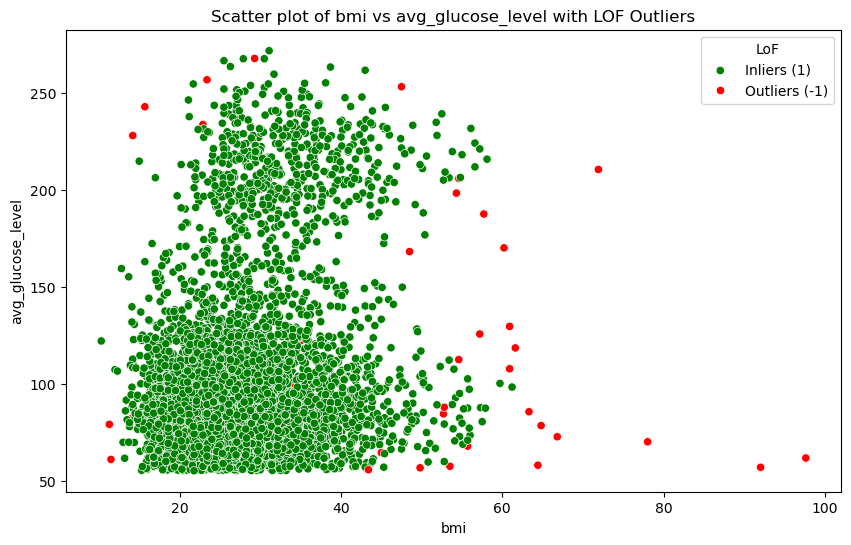

In [271]:
# scatter plots for all combinations of numerical variables
for i in range(len(num_features)):
    for j in range(i + 1, len(num_features)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=num_features[i], y=num_features[j], hue='lof_outlier', data=df, palette={-1:'r', 1:'g'})
        plt.title(f'Scatter plot of {num_features[i]} vs {num_features[j]} with LOF Outliers')
        plt.legend(title='LoF', labels=['Inliers (1)', 'Outliers (-1)'])
        plt.show()

In [34]:
df_original = df.copy() # save a deep copy of the df

#### RETRIEVE ORIGINAL DATAFRAME

In [35]:
# df = df_original.copy() # recall df as original df

### DROP OUTLIERS

In [273]:
# Drop outliers from the dataset
df = df[df['lof_outlier'] == 1] 
# check whether all outliers are dropped
print(df['lof_outlier'].value_counts())

lof_outlier
1    4844
Name: count, dtype: int64


it is observed that all the ourliers have beed successfully dropped

In [274]:
# drop 'lof_outlier' feature
df = df.drop('lof_outlier', axis = 1)

In [275]:
# Compare before and after removing outliers
print("\nOriginal dataset statistics:")
print(df_original.describe())

print("\nCleaned dataset statistics:")
print(df.describe())


Original dataset statistics:
               age  avg_glucose_level          bmi       stroke  lof_outlier
count  4886.000000        4886.000000  4886.000000  4886.000000  4886.000000
mean     42.988973         105.339073    28.909640     0.042775     0.982808
std      22.534968          44.481347     7.853621     0.202371     0.184649
min       0.080000          55.120000    10.300000     0.000000    -1.000000
25%      25.000000          77.062500    23.600000     0.000000     1.000000
50%      45.000000          91.680000    28.100000     0.000000     1.000000
75%      60.000000         113.545000    33.100000     0.000000     1.000000
max      82.000000         271.740000    97.600000     1.000000     1.000000

Cleaned dataset statistics:
               age  avg_glucose_level          bmi       stroke
count  4844.000000        4844.000000  4844.000000  4844.000000
mean     43.015549         105.190894    28.753427     0.042940
std      22.510683          44.219902     7.464706     0

now my dataset is cleaned and ready for analysis

#### 8.	Bivariate analysis: Perform at least one analysis for each of the following hypothesis tests:
-	Chi-square test to assess independence between two categorical variables.
-	Correlation analysis to examine relationships between two numeric variables.


#### Run 'Chi-square test of independence' to assess independence between two categorical variables.

ASSUMPTIONS FOR CHI-SQUARE TEST OF INDEPENDENCE
- Both variables should be categorical
- Categorical levels to be mutually exclusive.
- Independence
- The expected frequency for each cell in the contingency table should ideally be 5 or more
- The sample size should be 50 or more (atleast 30)

In [276]:
import researchpy as rp
rp.crosstab(df['gender'], df['stroke'], test= "chi-square")

(       stroke           
 stroke      0    1   All
 gender                  
 Female   2738  119  2857
 Male     1898   89  1987
 All      4636  208  4844,
                 Chi-square test  results
 0  Pearson Chi-square ( 1.0) =    0.2810
 1                    p-value =    0.5960
 2               Cramer's phi =    0.0076)

In [277]:
def chi_square (df=df, c1='gender', c2='stroke'):
    print(f"H0: THE VARIABLES ARE INDEPENDENT(There is no association between STROKE and GENDER);")
    print(f"H1: THE VARIABLES ARE DEPENDENT(There is an association between STROKE and GENDER);")
    print(f"\nChi-square test: {c1} and {c2}")
    print('-'*42)
    contingency_table = pd.crosstab(df[c1], df[c2], margins = False)
    print(f"contingency Table:\n",contingency_table)
    chi2, p_val, dof, exp_val = chi2_contingency(contingency_table)
    # chi2, p, dof, expected
    print(f"\nExpected frequencies:\n", pd.DataFrame(exp_val))
    
    print(f"\nChi-square statistic: {chi2:.4f}")
    print(f"P-value             : {p_val:.4f}")
    print(f"Degrees of freedom  : {dof}")
    
    if p_val > 0.05:
        print(f'\nSince p_value: {p_val:.4f} is >= alpha(0.05), we fail to reject the H(0), \nwe conclude with 95% confidence that, THE VARIABLES ARE INDEPENDENT\n')
    
    else:
        print(f'\nSince p_value: {p_val:.4f} is < alpha(0.05),we reject the H(0), \nwe conclude with 95% confidence that, THE VARIABLES ARE DEPENDENT\n')
    


#### STROKE VS GENDER

In [278]:
df.groupby(['stroke','gender']).size().reset_index(name='count').T

0     1       2     3
stroke       0     0       1     1
gender  Female  Male  Female  Male
count     2738  1898     119    89

#### CHI-SQUARE TEST OF INDEPENDENCE

In [279]:
chi_square ()

H0: THE VARIABLES ARE INDEPENDENT(There is no association between STROKE and GENDER);
H1: THE VARIABLES ARE DEPENDENT(There is an association between STROKE and GENDER);

Chi-square test: gender and stroke
------------------------------------------
contingency Table:
 stroke     0    1
gender           
Female  2738  119
Male    1898   89

Expected frequencies:
              0           1
0  2734.321222  122.678778
1  1901.678778   85.321222

Chi-square statistic: 0.2098
P-value             : 0.6469
Degrees of freedom  : 1

Since p_value: 0.6469 is >= alpha(0.05), we fail to reject the H(0), 
we conclude with 95% confidence that, THE VARIABLES ARE INDEPENDENT



#### VIUALIZATION

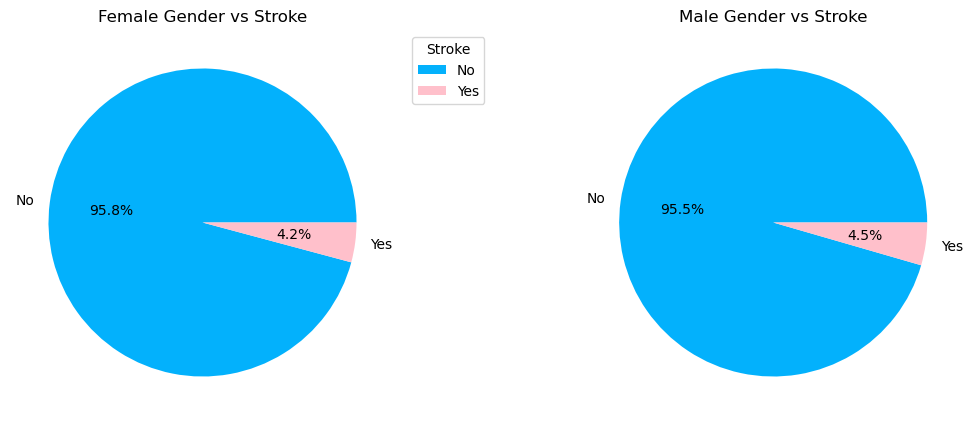

In [280]:
# plot pie chart
f_gender = df['stroke'][df.gender == 'Female'].value_counts()
m_gender = df['stroke'][df.gender == 'Male'].value_counts()

fig, ax = plt.subplots(1,2, figsize = (13.5,5))

ax[0].pie(f_gender, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink']) #lambda p: f'{int(p * sum(f_gender) / 100)}'
ax[0].set_title('Female Gender vs Stroke')
ax[0].legend(title='Stroke', loc='upper right', bbox_to_anchor=(1.25, 1)) 

ax[1].pie(m_gender, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink'])
ax[1].set_title('Male Gender vs Stroke')

plt.show()

#### STROKE VS SMOKING_STATUS

In [44]:
df.groupby(['stroke','smoking_status']).size().reset_index(name='count').T

0                1             2       3        4  \
stroke                0                0             0       0        1   
smoking_status  Unknown  formerly smoked  never smoked  smokes  Unknown   
count              1430              775          1739     692       29   

                              5             6       7  
stroke                        1             1       1  
smoking_status  formerly smoked  never smoked  smokes  
count                        57            83      39

#### CHI-SQUARE TEST OF INDEPENDENCE

In [45]:
chi_square (df=df, c1='smoking_status', c2='stroke')

H0: THE VARIABLES ARE INDEPENDENT(There is no association between STROKE and GENDER);
H1: THE VARIABLES ARE DEPENDENT(There is an association between STROKE and GENDER);

Chi-square test: smoking_status and stroke
------------------------------------------
contingency Table:
 stroke              0   1
smoking_status           
Unknown          1430  29
formerly smoked   775  57
never smoked     1739  83
smokes            692  39

Expected frequencies:
              0          1
0  1396.350950  62.649050
1   796.274154  35.725846
2  1743.763832  78.236168
3   699.611065  31.388935

Chi-square statistic: 34.3521
P-value             : 0.0000
Degrees of freedom  : 3

Since p_value: 0.0000 is < alpha(0.05),we reject the H(0), 
we conclude with 95% confidence that, THE VARIABLES ARE DEPENDENT



#### VISUALIZATION

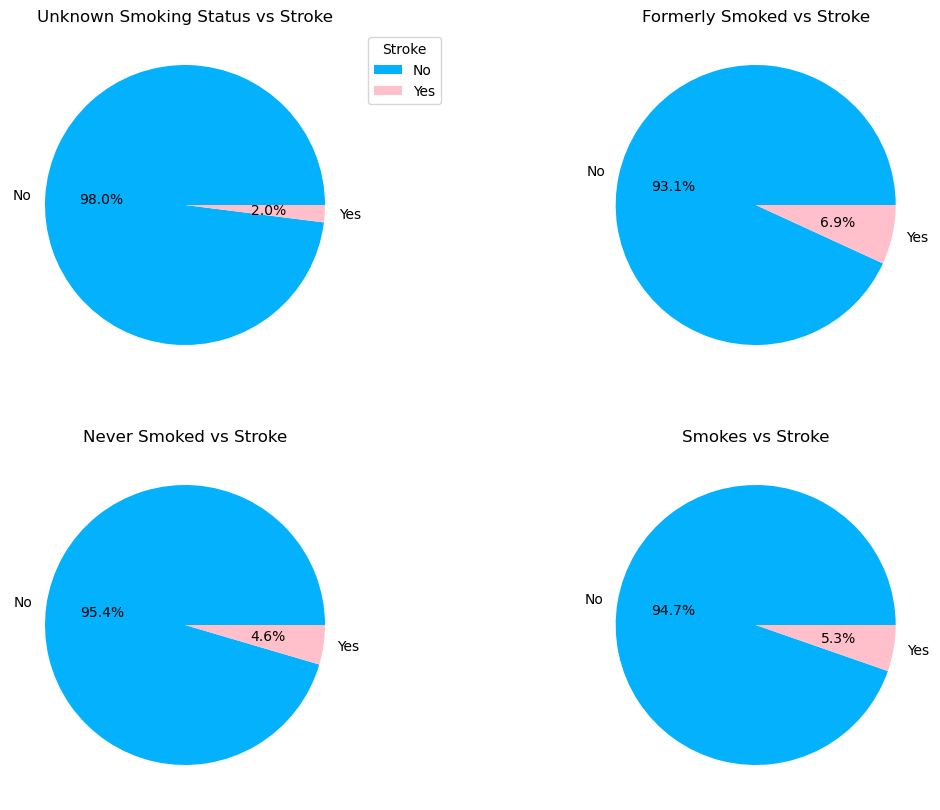

In [46]:
# plot pie chart
smoking_st = df['stroke'][df.smoking_status == 'Unknown'].value_counts()
formaly_smoked = df['stroke'][df.smoking_status == 'formerly smoked'].value_counts()
never_smoked = df['stroke'][df.smoking_status == 'never smoked'].value_counts()
smokes = df['stroke'][df.smoking_status == 'smokes'].value_counts()

fig, ax = plt.subplots(2,2, figsize = (13.5,10))

ax[0,0].pie(smoking_st, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink']) 
ax[0,0].set_title('Unknown Smoking Status vs Stroke')
ax[0,0].legend(title='Stroke', loc='upper right', bbox_to_anchor=(1.25, 1)) 

ax[0,1].pie(formaly_smoked, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink'])
ax[0,1].set_title('Formerly Smoked vs Stroke')

ax[1,0].pie(never_smoked, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink'])
ax[1,0].set_title('Never Smoked vs Stroke')

ax[1,1].pie(smokes, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink'])
ax[1,1].set_title('Smokes vs Stroke')

plt.show()

#### CORRELATION ANALYSIS TO EXAMINE RELATIONSHIPS BETWEEN TWO NUMERIC VARIABLES.

ASSUMPTIONS FOR CORRELATION
- Level of measurement – Interval or ratio level
- Variables should have a linear relationship 
- Normallity
- Should have Paired values (x,y)
- No Outliers

Correlation Matrix:
                        age       bmi  avg_glucose_level
age                1.000000  0.353830           0.236939
bmi                0.353830  1.000000           0.188821
avg_glucose_level  0.236939  0.188821           1.000000


Text(0.5, 1.0, 'Correlation Matrix')

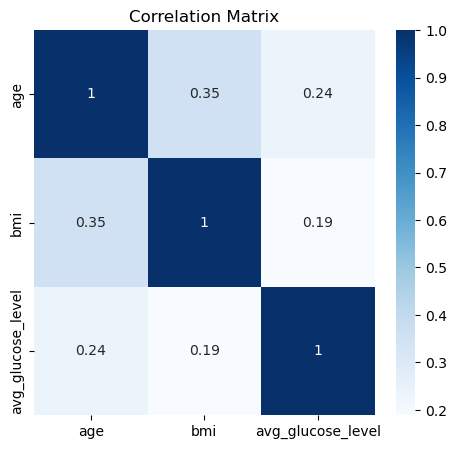

In [52]:
# Correlation Analysis
correlation_matrix = df[num_features].corr() #df.corr(numeric_only=True)
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(5.5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix")

### OBSERVATIONS:
- Age has some correlations to bmi, avg_gluclose_level
- All categories have a positive correlation to each other (no negatives)

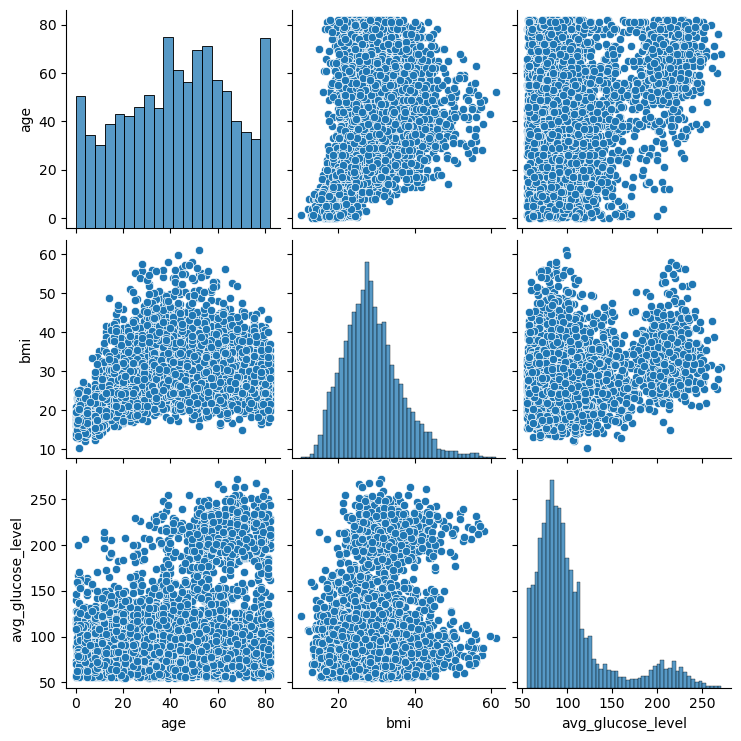

In [53]:
sns.pairplot(df[num_features])

In [54]:
# Correlation analysis: age and avg_glucose_level
print(f"\nCorrelation analysis: age and avg_glucose_level\n")
correlation, p_value = pearsonr(df['age'], df['avg_glucose_level'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value                        : {p_value:.4f}")

if p_value >= 0.05:
    print(f"\nSince p value: {p_value:.4f} is >= alpha(0.05), we fail to reject the null hypothesis,\nand conclude that there is NO statistically significant linear relationship between the variables.\n")    
else:
    print(f"\nSince p value: {p_value:.4f} is < alpha(0.05), we reject null hypothesis, and conclude \nthat there is a statistically significant linear relationship between the variables.\n")


Correlation analysis: age and avg_glucose_level

Pearson correlation coefficient: 0.2369
P-value                        : 0.0000

Since p value: 0.0000 is < alpha(0.05), we reject null hypothesis, and conclude 
that there is a statistically significant linear relationship between the variables.



Pearson Correlation between'Age'and 'Avg_glucose_level': 0.23693863450518587


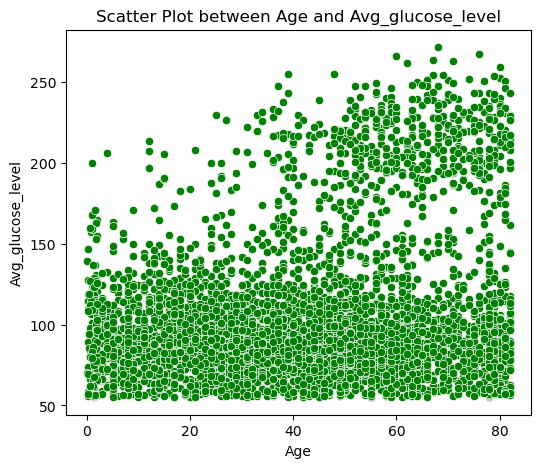

In [55]:
correlation=df['age'].corr(df['avg_glucose_level'])
print(f"Pearson Correlation between'Age'and 'Avg_glucose_level': {correlation}")

plt.figure(figsize=(6, 5))
sns.scatterplot(x='age', y='avg_glucose_level', data=df, color='green')
plt.title('Scatter Plot between Age and Avg_glucose_level')
plt.xlabel('Age')
plt.ylabel('Avg_glucose_level')
plt.show()


In [56]:
# Correlation analysis: age and avg_glucose_level
print(f"\nCorrelation analysis: age and bmi\n")
correlation, p_value = pearsonr(df['age'], df['bmi'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value                        : {p_value:.4f}")

if p_value >= 0.05:
    print(f"\nSince p value: {p_value:.4f} is >= alpha(0.05), we fail to reject the null hypothesis,\nand conclude that there is NO statistically significant linear relationship between the variables.\n")    
else:
    print(f"\nSince p value: {p_value:.4f} is < alpha(0.05), we reject null hypothesis, and conclude \nthat there is a statistically significant linear relationship between the variables.\n")


Correlation analysis: age and bmi

Pearson correlation coefficient: 0.3538
P-value                        : 0.0000

Since p value: 0.0000 is < alpha(0.05), we reject null hypothesis, and conclude 
that there is a statistically significant linear relationship between the variables.



Pearson Correlation between'age'and 'bmi': 0.35382989048383806


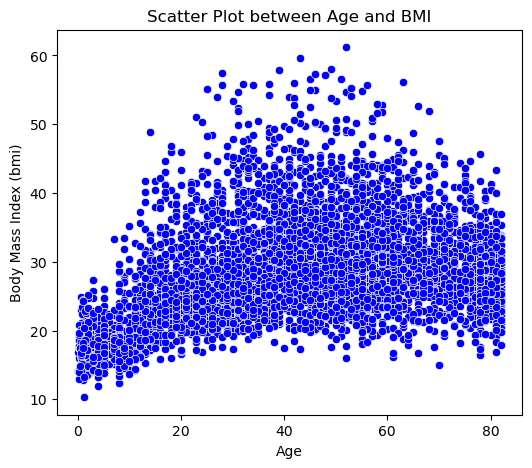

In [57]:
correlation=df['age'].corr(df['bmi'])
print(f"Pearson Correlation between'age'and 'bmi': {correlation}")

plt.figure(figsize=(6, 5))
sns.scatterplot(x='age', y='bmi', data=df, color='blue')
plt.title('Scatter Plot between Age and BMI')
plt.xlabel('Age')
plt.ylabel('Body Mass Index (bmi)')
plt.show()

In [58]:
# Correlation analysis: bmi and avg_glucose_level
print(f"\nCorrelation analysis: BMI and AVG_Glucose_Level\n")
correlation, p_value = pearsonr(df['bmi'], df['avg_glucose_level'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value                        : {p_value:.4f}")

if p_value >= 0.05:
    print(f"\nSince p value: {p_value:.4f} is >= alpha(0.05), we fail to reject the null hypothesis,\nand conclude that there is NO statistically significant linear relationship between the variables.\n")    
else:
    print(f"\nSince p value: {p_value:.4f} is < alpha(0.05), we reject null hypothesis, and conclude \nthat there is a statistically significant linear relationship between the variables.\n")


Correlation analysis: BMI and AVG_Glucose_Level

Pearson correlation coefficient: 0.1888
P-value                        : 0.0000

Since p value: 0.0000 is < alpha(0.05), we reject null hypothesis, and conclude 
that there is a statistically significant linear relationship between the variables.



Pearson Correlation between'BMI'and 'Avg_glucose_level': 0.18882127846601615


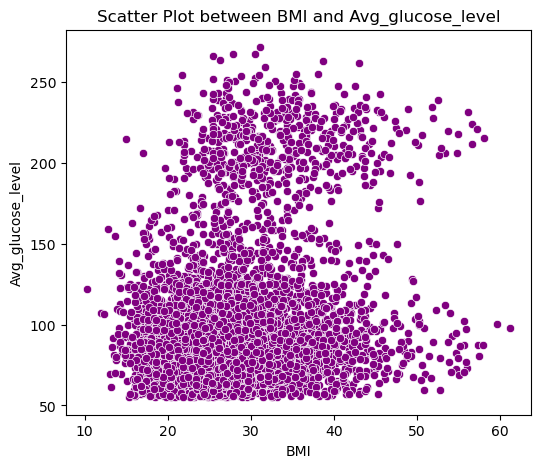

In [59]:
correlation=df['bmi'].corr(df['avg_glucose_level'])
print(f"Pearson Correlation between'BMI'and 'Avg_glucose_level': {correlation}")

plt.figure(figsize=(6, 5))
sns.scatterplot(x='bmi', y='avg_glucose_level', data=df, color='purple')
plt.title('Scatter Plot between BMI and Avg_glucose_level')
plt.xlabel('BMI')
plt.ylabel('Avg_glucose_level')
plt.show()


#### 9.	CHECK FOR PRESENCE OF COLLINEARITY AND MULTI-COLLINEARITY AND ADDRESS IT APPROPRIATELY.

<Axes: >

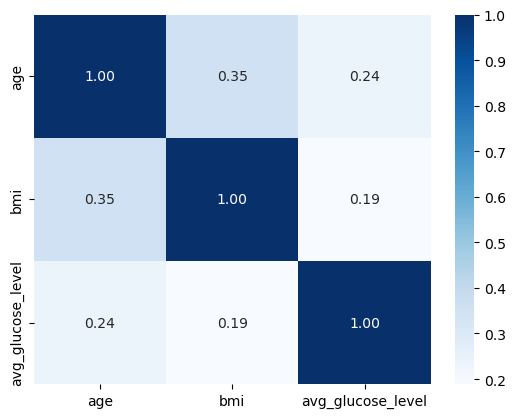

In [60]:
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 10},  fmt = ".2f", cmap='Blues')

Perusal of above heatmap explains us that there is no significant correlation in above variables

In [61]:
# Check the VIF valus of the feature variables. 
print(f"Check for Collinearity and Multi-collinearity using VIF")

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = df[num_features].columns
vif['VIF'] = [variance_inflation_factor(df[num_features].values, i) for i in range(df[num_features].shape[1])]
print(vif)

Check for Collinearity and Multi-collinearity using VIF
            Features       VIF
0                age  5.484109
1                bmi  8.402600
2  avg_glucose_level  6.173610


In [62]:
vif_above_10 = (vif.VIF>10).sum()
if vif_above_10 >0:
    print(f"There are {vif_above_10} variables with VIF score greater than 10")
    print(f"consider dropping them")
else:
    print(f"There are {vif_above_10} variables with VIF score greater than 10")
    print(f"No action is required")

There are 0 variables with VIF score greater than 10
No action is required


#### 10. ENCODE THE DATA IF REQUIRED (IF THERE ARE CATEGORICAL INDEPENDENT VARIABLES).

In [63]:
print(f"Dummy variable encoding for categorical features:\n")
df_dummy = pd.get_dummies(df,columns=['gender', 'hypertension', 'heart_disease', 'ever_married', \
                                      'work_type','Residence_type', 'smoking_status'], drop_first=True)
df_dummy.info()

Dummy variable encoding for categorical features:

<class 'pandas.core.frame.DataFrame'>
Index: 4844 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4844 non-null   float64
 1   avg_glucose_level               4844 non-null   float64
 2   bmi                             4844 non-null   float64
 3   stroke                          4844 non-null   int64  
 4   gender_Male                     4844 non-null   bool   
 5   hypertension_Yes                4844 non-null   bool   
 6   heart_disease_Yes               4844 non-null   bool   
 7   ever_married_Yes                4844 non-null   bool   
 8   work_type_Private               4844 non-null   bool   
 9   work_type_Self-employed         4844 non-null   bool   
 10  work_type_children              4844 non-null   bool   
 11  Residence_type_Urban            4844 non-null   b

#### 11. SPLIT THE DATASET INTO TRAINING AND TESTING SUBSETS

My target variable is 'stroke' and my focus is to build model/s for prediction of stroke for new patients.

In [64]:
print(f"Splitting dataset into training and testing sets\n")
# defin features (X) and target(y)
X = df_dummy.drop('stroke', axis=1)
y = df_dummy['stroke']

# split train test data(train 80%, test 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}\nX_test shape:{X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape:{y_test.shape}")

Splitting dataset into training and testing sets

X_train shape: (3875, 14)
X_test shape:(969, 14)
y_train shape: (3875,)
y_test shape:(969,)


In [65]:
X_train.head(3)

age  avg_glucose_level   bmi  gender_Male  hypertension_Yes  \
1513  18.0             143.45  32.0         True             False   
4928  11.0             121.71  23.4         True             False   
467   43.0             217.30  27.5        False              True   

      heart_disease_Yes  ever_married_Yes  work_type_Private  \
1513              False             False               True   
4928              False             False              False   
467               False             False              False   

      work_type_Self-employed  work_type_children  Residence_type_Urban  \
1513                    False               False                 False   
4928                    False                True                 False   
467                      True               False                 False   

      smoking_status_formerly smoked  smoking_status_never smoked  \
1513                           False                        False   
4928                           False                         True   
467                            False                         True   

      smoking_status_smokes  
1513                   True  
4928                  False  
467                   False

#### 12. SCALE THE TRAINING DATA AND USE THE SAME SCALER TO ALSO SCALE THE TEST DATA.

In [66]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit and tranform on training data
X_train_sc = sc.fit_transform(X_train) 
X_test_sc  = sc.transform(X_test)

print(f"X_train_sc shape: {X_train_sc.shape}\nX_test_sc shape:{X_test_sc.shape}")

X_train_sc shape: (3875, 14)
X_test_sc shape:(969, 14)


In [67]:
print(f"\nScaled X_train head:")
X_train_sc


Scaled X_train head:


array([[-1.11442149e+00,  8.66453517e-01,  4.47906202e-01, ...,
        -4.58867301e-01, -7.67735342e-01,  2.35256668e+00],
       [-1.42594062e+00,  3.72853986e-01, -7.14211654e-01, ...,
        -4.58867301e-01,  1.30253219e+00, -4.25067654e-01],
       [-1.85315124e-03,  2.54319341e+00, -1.60178723e-01, ...,
        -4.58867301e-01,  1.30253219e+00, -4.25067654e-01],
       ...,
       [-3.57875018e-01, -8.03929074e-01, -1.33152726e-01, ...,
        -4.58867301e-01, -7.67735342e-01, -4.25067654e-01],
       [ 1.46673705e+00, -2.04298732e-01, -4.43951688e-01, ...,
        -4.58867301e-01, -7.67735342e-01,  2.35256668e+00],
       [-7.13896886e-01, -3.70496919e-01,  1.54902551e-02, ...,
        -4.58867301e-01,  1.30253219e+00, -4.25067654e-01]])

In [68]:
print(f"\nScaled X_test head:")
X_test_sc


Scaled X_test head:


array([[-1.38143789e+00, -5.19893649e-01, -1.56553055e+00, ...,
        -4.58867301e-01,  1.30253219e+00, -4.25067654e-01],
       [ 3.98671449e-01, -6.28876066e-01, -1.48445256e+00, ...,
         2.17927928e+00, -7.67735342e-01, -4.25067654e-01],
       [ 4.87676916e-01, -6.75874733e-01,  1.97725679e-03, ...,
         2.17927928e+00, -7.67735342e-01, -4.25067654e-01],
       ...,
       [ 9.32704250e-01, -9.78073894e-01, -5.20747365e-02, ...,
        -4.58867301e-01, -7.67735342e-01, -4.25067654e-01],
       [ 2.65163249e-01,  7.75180742e-01,  1.55597206e+00, ...,
         2.17927928e+00, -7.67735342e-01, -4.25067654e-01],
       [ 1.68925072e+00, -2.76045490e-01, -3.49360700e-01, ...,
        -4.58867301e-01, -7.67735342e-01, -4.25067654e-01]])

#### 13.Perform PCA. Based on outcome, recommend if Principal Components would be useful for data preparation or not. 

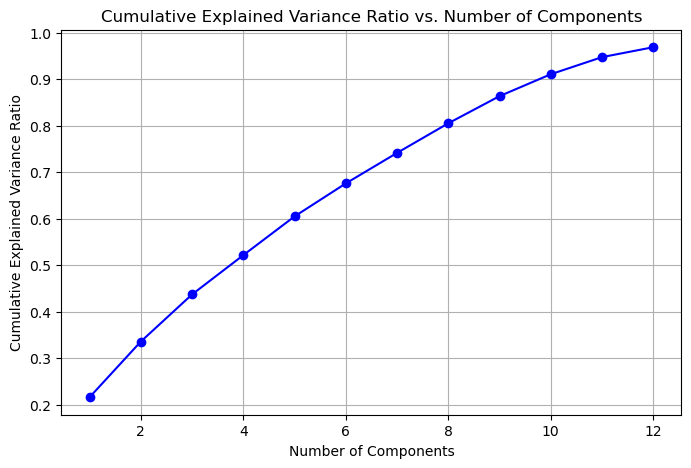

Number of components explaining 95% variance: 12

PC1 explained variance ratio: 0.2162
PC2 explained variance ratio: 0.1196
PC3 explained variance ratio: 0.1013
PC4 explained variance ratio: 0.0844
PC5 explained variance ratio: 0.0833
PC6 explained variance ratio: 0.0709
PC7 explained variance ratio: 0.0656
PC8 explained variance ratio: 0.0636
PC9 explained variance ratio: 0.0584
PC10 explained variance ratio: 0.0471

PCA significantly reduces dimensionality while preserving variance, hence it can be useful for this dataset.


In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) 
X_train_sc_red = pca.fit_transform(X_train_sc)
X_test_sc_red  = pca.transform(X_test_sc)

exp_var_ratio = pca.explained_variance_ratio_
cum_exp_var_ratio = np.cumsum(exp_var_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_exp_var_ratio) + 1),cum_exp_var_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# how many components explain at least 95% variance?
num_components = np.argmax(cum_exp_var_ratio >= 0.95) + 1
print(f'Number of components explaining 95% variance: {num_components}\n')
for i, ratio in enumerate(exp_var_ratio[:10]):
    print(f"PC{i+1} explained variance ratio: {ratio:.4f}")

# Recomendation based on PCA outcome
if num_components < X_train_sc.shape[1] * 0.9:
    print(f"\nPCA significantly reduces dimensionality while preserving variance, hence it can be useful for this dataset.")
else:
    print(f"PCA didn't provide significant dimensionality reduction. Using original features might be preferable.")

In [70]:
pca_components = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=X.columns)
print("\nComponent loadings for the Principal Components")
pca_components


Component loadings for the Principal Components


PC1       PC2       PC3       PC4  \
age                             0.495243 -0.123161  0.029961 -0.049906   
avg_glucose_level               0.191798 -0.138731 -0.037911  0.481550   
bmi                             0.356091  0.117256 -0.028423 -0.003712   
gender_Male                    -0.023276 -0.105413 -0.235388  0.414029   
hypertension_Yes                0.199874 -0.151496  0.053289  0.288315   
heart_disease_Yes               0.157228 -0.174938 -0.151732  0.355347   
ever_married_Yes                0.447473 -0.020224  0.010610 -0.152365   
work_type_Private               0.171646  0.630206 -0.196879  0.149909   
work_type_Self-employed         0.167217 -0.556596  0.243723 -0.300181   
work_type_children             -0.473442 -0.219563 -0.024864  0.166602   
Residence_type_Urban            0.010780 -0.006293 -0.049726 -0.217670   
smoking_status_formerly smoked  0.162438 -0.256956 -0.336103  0.089728   
smoking_status_never smoked     0.109817  0.240145  0.697142  0.156332   
smoking_status_smokes           0.074632  0.088646 -0.463950 -0.375986   

                                     PC5       PC6       PC7       PC8  \
age                             0.006354 -0.035010  0.058441  0.123837   
avg_glucose_level              -0.164339  0.156560 -0.290152 -0.138214   
bmi                             0.018820  0.029510  0.015557 -0.341785   
gender_Male                    -0.136167 -0.046604  0.808111 -0.268976   
hypertension_Yes               -0.208650  0.175367 -0.390015 -0.421444   
heart_disease_Yes              -0.283340  0.001558 -0.029515  0.754115   
ever_married_Yes                0.049118 -0.071593  0.122175  0.033550   
work_type_Private               0.111722  0.025032 -0.027139  0.075239   
work_type_Self-employed        -0.088805 -0.085050  0.117561 -0.033090   
work_type_children             -0.050131  0.060956 -0.107170 -0.039524   
Residence_type_Urban           -0.028951  0.954005  0.176262  0.087861   
smoking_status_formerly smoked  0.675337  0.031637 -0.069677  0.021770   
smoking_status_never smoked    -0.103114  0.034608  0.154806  0.067039   
smoking_status_smokes          -0.580858 -0.106957 -0.072602 -0.089218   

                                     PC9      PC10      PC11      PC12  
age                             0.092547 -0.231931  0.076099 -0.051111  
avg_glucose_level              -0.655712 -0.328548 -0.112251 -0.007862  
bmi                            -0.289844  0.760924  0.256089 -0.033339  
gender_Male                     0.093570 -0.054336 -0.058710  0.008784  
hypertension_Yes                0.659517  0.026571 -0.043670 -0.021166  
heart_disease_Yes               0.114543  0.337969  0.043472 -0.001948  
ever_married_Yes                0.044170 -0.349208  0.615976 -0.051450  
work_type_Private               0.087219 -0.078649 -0.295064 -0.350618  
work_type_Self-employed        -0.077888  0.089063 -0.435541 -0.299968  
work_type_children             -0.015061  0.000068  0.447815  0.001467  
Residence_type_Urban           -0.008305 -0.010721  0.001139 -0.001710  
smoking_status_formerly smoked  0.055905  0.038107 -0.174883  0.500583  
smoking_status_never smoked     0.005442  0.005302 -0.091063  0.560957  
smoking_status_smokes          -0.039411 -0.060977 -0.114812  0.463534

Observations:
Cumulative Explained Variance Plot:
- The graph shows that the cumulative explained variance increases as the number of components increases.
- By the time 10 components are included, the cumulative explained variance is close to 95%. This indicates that these 10 components effectively capture most of the variability in the data.

Explained Variance Ratios:
- PC1 explains 21.62% of the variance, followed by PC2 with 11.96%, and PC3 with 10.13%.
- The contribution of subsequent components decreases gradually, with PC10 explaining only 4.71% of the variance.
- This diminishing trend highlights that the most critical information is concentrated in the first few components.

Flattening of the Curve:
- Eventhough, a significan curve flatterning is not observed, it is observed that the curve is trying to get flatten after 10 components, suggesting that additional components contribute minimal additional variance.

Interpretation:
The PCA results demonstrate that the dataset benefits from dimensionality reduction, as 91% of the variance is captured with only 10 components, compared to the total number of original features. By reducing the number of dimensions, we can streamline modeling without losing significant information.

Recommendation on PCA Usefulness
Based on the results, Principal Components are useful for data preparation in this case, as they:
- Reduce dimensionality while retaining most of the information.
- Mitigate issues like multicollinearity by transforming the dataset into uncorrelated components.
- Enhance computational efficiency for models, particularly for high-dimensional data.

SO, we can use the first 10 principal components for subsequent modeling steps instead of the original features.

### 14.	Depending on prediction goal, refer to appropriate section below: 
-	Classification: Build models based on atleast 3 different algorithms<br>
    i.	Logistic Regression / DecisionTreeClassifier / LDA: Choose any one of these 3. <br>
    ii.	KNN, SVM, RandomForest, AdaBoost, XGBoost: For models other than KNN, tune atleast 3 hyperparameters using GridSearchCV.


#### Logistic Regression

In [71]:
X_train_sc_red # done in PCA
X_test_sc_red  # done in PCA
exp_var_ratio  # done in PCA

# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

# model with default parameters
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_sc_red, y_train)

LogisticRegression(random_state=42)

In [72]:
y_pred_tr= model_lr.predict(X_train_sc_red)
y_pred_te= model_lr.predict(X_test_sc_red)

print("Logistic Regression")
print("* overall accuracy score--Training set*")
print(accuracy_score(y_train, y_pred_tr))

from sklearn.metrics import confusion_matrix
print('confusion matrix=')
print(confusion_matrix(y_train, y_pred_tr))

print('classification report=')
print(classification_report(y_train, y_pred_tr))

print("* overall accuracy score-- Test set*")
print(accuracy_score(y_test, y_pred_te))

print('confusion matrix=')
print(confusion_matrix(y_test,y_pred_te))

print('classification report=')
print(classification_report(y_test, y_pred_te))

Logistic Regression
* overall accuracy score--Training set*
0.9571612903225807
confusion matrix=
[[3709    0]
 [ 166    0]]
classification report=
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3709
           1       0.00      0.00      0.00       166

    accuracy                           0.96      3875
   macro avg       0.48      0.50      0.49      3875
weighted avg       0.92      0.96      0.94      3875

* overall accuracy score-- Test set*
0.957688338493292
confusion matrix=
[[927   0]
 [ 41   1]]
classification report=
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       927
           1       1.00      0.02      0.05        42

    accuracy                           0.96       969
   macro avg       0.98      0.51      0.51       969
weighted avg       0.96      0.96      0.94       969



As you can see, since this data is imbalaced the algorithm finds the best acuracy when it predicts 0 for most of the records which means this model is not able to distinguesh between positive and nagative class. hoewever, However, model has not indicated any overfitting, 

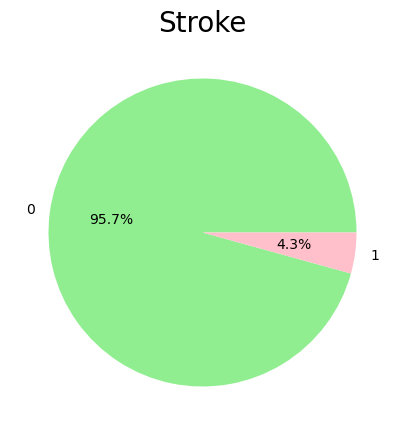

In [73]:
stat=df.stroke.value_counts(normalize=True)*100
# stat = y_test.value_counts(normalize=True)

plt.rcParams["figure.figsize"] = (5,5)
plt.pie(stat, labels= stat.index, autopct='%.1f%%', colors=['lightgreen', 'pink'])
plt.title("Stroke", y=1, fontdict={"fontsize": 20})
plt.show() 

In [74]:
# # Convert y_train and y_test to integers
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

In [75]:
# create an entry to store the data
def store_results(name, X_tr, y_tr, X_te, y_te, model, folds, Class_weight="N/A" ):
    '''
    creates an entry to add to the results dataframe
    name: name of the model  
    ytrain: true value of y
    xtrain: features 
    model: model to be fit
    folds: number of folds in cv
    class_weight : Weights associated with classes 
    '''
    #train the model & predict
    model.fit(X_tr,y_tr)
    y_pred = model.predict(X_te)
    y_pred_train=model.predict(X_tr)
    train_accuracy_score =accuracy_score(y_tr,y_pred_train)
    test_accuracy_score =accuracy_score(y_te,y_pred)
    train_f1_score =round(metrics.f1_score(y_tr,y_pred_train),2)
    test_f1_score =round(metrics.f1_score(y_te,y_pred),2) 
    train_recall =round(recall_score(y_tr,y_pred_train),2)
    test_recall =round(recall_score(y_te,y_pred),2)
    print('Classification_report - TEST SET:\n')
    print(classification_report(y_te,y_pred))
    print("="*100)
    
    # Compute and plot the Confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_te, y_pred)
    disp = metrics.ConfusionMatrixDisplay(cnf_matrix)
    disp.plot()
    plt.show()
    print("="*100)
    
    print('train f1 score:\n')
    print(round(metrics.f1_score(y_tr,y_pred_train),4))
    print("="*100)
    
    print('test f1 score:\n')
    print(round(metrics.f1_score(y_te,y_pred),4))
    print("="*100)
    
    # Compute and plot RoC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_te, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    display.plot()
    plt.show()


    # Cross validation scores for the model. 
    auc=cross_val_score(model,X_tr,y_tr,cv=folds, n_jobs=-1,scoring='roc_auc').mean()
    Accuracy=cross_val_score(model,X_tr,y_tr,cv=folds, n_jobs=-1).mean()
    scores = cross_val_score(model,X_tr,y_tr,cv=folds, n_jobs=-1,scoring='f1')
    f1score=scores.mean()

    entry = {'Model': [name],
         'Class_weight' : [Class_weight],
         'AUC-Train':[auc],
         'AUC-Test':[roc_auc],
         'train_recall_pos_class': [train_recall],
         'test_recall_pos_class': [test_recall],
         'train_accuracy_score': [train_accuracy_score],
         'test_accuracy_score': [test_accuracy_score],
         'train_f1_score': [train_f1_score],
         'test_f1_score': [test_f1_score],
         'CrossVal_Mean(Accuracy)': [Accuracy],  
         'CrossVal_Mean(F1_score)': [f1score],
         'CrossVal1(f1)': [scores[0]],
         'CrossVal2(f1)': [scores[1]],
         'CrossVal3(f1)': [scores[2]],
         'CrossVal4(f1)': [scores[3]],
         'CrossVal5(f1)': [scores[4]],
          }


    result = pd.DataFrame(entry)
    return result


## Model 1: Logistic Regression classifier based on imbalanced dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       927
           1       0.00      0.00      0.00        42

    accuracy                           0.96       969
   macro avg       0.48      0.50      0.49       969
weighted avg       0.92      0.96      0.94       969



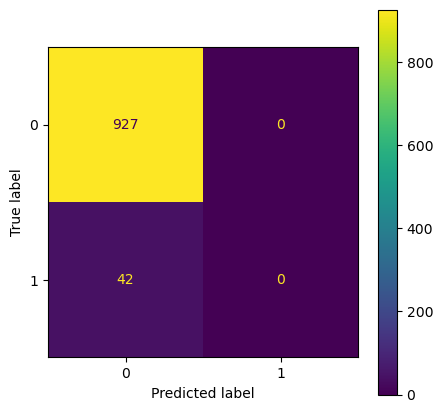

train f1 score:

0.012
test f1 score:

0.0


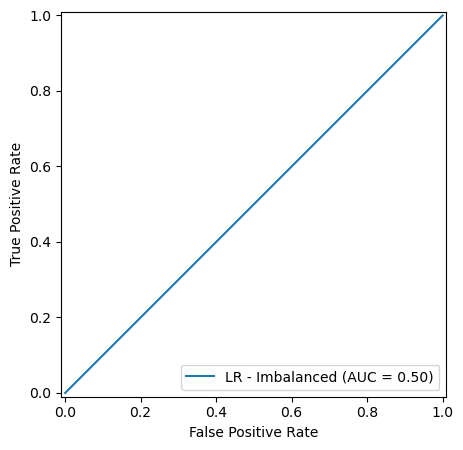

Model Class_weight  AUC-Train  AUC-Test  train_recall_pos_class  \
0  LR - Imbalanced          N/A   0.835349       0.5                    0.01   

   test_recall_pos_class  train_accuracy_score  test_accuracy_score  \
0                    0.0              0.957419             0.956656   

   train_f1_score  test_f1_score  CrossVal_Mean(Accuracy)  \
0            0.01            0.0                 0.957161   

   CrossVal_Mean(F1_score)  CrossVal1(f1)  CrossVal2(f1)  CrossVal3(f1)  \
0                 0.011765            0.0       0.058824            0.0   

   CrossVal4(f1)  CrossVal5(f1)  
0            0.0            0.0

In [76]:
# Model 1:  Logistic Regression classifier based on imbalanced dataset
from sklearn import metrics
from sklearn.metrics import recall_score

LR_imb = LogisticRegression()
X_imb_tr, X_imb_te, y_imb_tr, y_imb_te = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 1)
sc_imb = StandardScaler()
X_imb_tr = sc_imb.fit_transform(X_imb_tr)
X_imb_te = sc_imb.transform(X_imb_te)
         # store_results(name, X_tr, y_tr, X_te, y_te, model, folds, Class_weight="N/A" )
All_Models = store_results("LR - Imbalanced", X_imb_tr, y_imb_tr, X_imb_te, y_imb_te, \
                           LR_imb, 5, Class_weight="N/A" )
All_Models


### Model 2:  Logistic Regression classifier based on undersampled dataset

In [77]:
# Model 2:  Logistic Regression classifier based on undersampled dataset
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=1, replacement=True)
X_under_tr, y_under_tr = undersample.fit_resample(X_train, y_train)
data_undersampled = pd.concat([X_under_tr, y_under_tr], axis =1)
data_undersampled.shape

sc_under = StandardScaler()
X_under_tr = sc_under.fit_transform(X_under_tr)
X_under_te = sc_under.transform(X_test)
X_under_tr.shape, X_under_te.shape

((332, 14), (969, 14))

In [78]:
data_undersampled.stroke.value_counts()

stroke
0    166
1    166
Name: count, dtype: int64

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       927
           1       0.11      0.74      0.19        42

    accuracy                           0.73       969
   macro avg       0.55      0.73      0.52       969
weighted avg       0.95      0.73      0.81       969



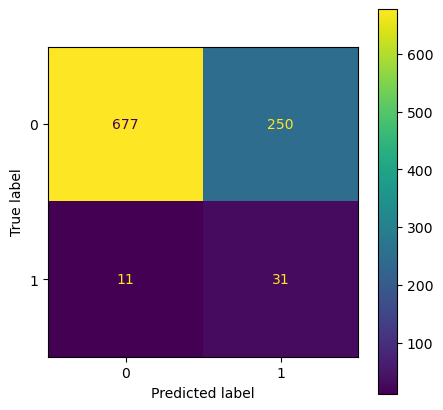

train f1 score:

0.8198
test f1 score:

0.192


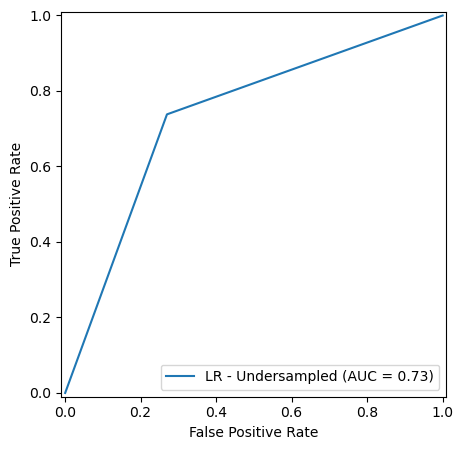

Model Class_weight  AUC-Train  AUC-Test  \
0    LR - Imbalanced          N/A   0.835349  0.500000   
0  LR - Undersampled          N/A   0.854346  0.734204   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.01                   0.00              0.957419   
0                    0.85                   0.74              0.813253   

   test_accuracy_score  train_f1_score  test_f1_score  \
0             0.956656            0.01           0.00   
0             0.730650            0.82           0.19   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                 0.957161                 0.011765        0.00000   
0                 0.785889                 0.791177        0.84058   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0       0.058824       0.000000       0.000000       0.000000  
0       0.818182       0.823529       0.685714       0.787879

In [79]:
LR_under = LogisticRegression()
         # store_results(name, X_tr, y_tr, X_te, y_te, model, folds, Class_weight="N/A" )
next_model = store_results("LR - Undersampled", X_under_tr, y_under_tr, X_under_te, y_test, \
                           LR_under, 5, Class_weight="N/A" )
All_Models = pd.concat([All_Models, next_model])
All_Models

### Model 3: Logistic Regression classifier based on oversampled dataset

In [80]:
# Model 3: Logistic Regression classifier based on oversampled dataset
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=1)
X_over_tr, y_over_tr = oversample.fit_resample(X_train, y_train)

data_oversampled = pd.concat([X_over_tr, y_over_tr], axis =1)
data_oversampled.shape

#scaling the train and test datasets for oversampling

sc_over = StandardScaler()
X_over_tr = sc_over.fit_transform(X_over_tr)
X_over_te = sc_over.transform(X_test)


Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.98      0.74      0.85       927
           1       0.12      0.74      0.20        42

    accuracy                           0.74       969
   macro avg       0.55      0.74      0.52       969
weighted avg       0.95      0.74      0.82       969



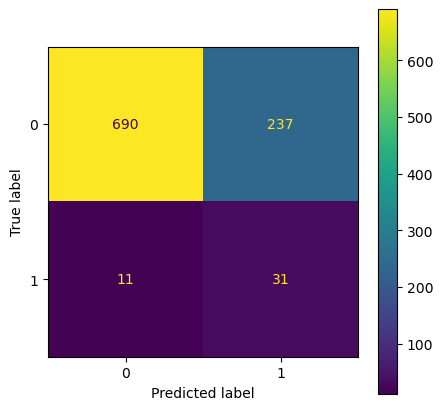

train f1 score:

0.7935
test f1 score:

0.2


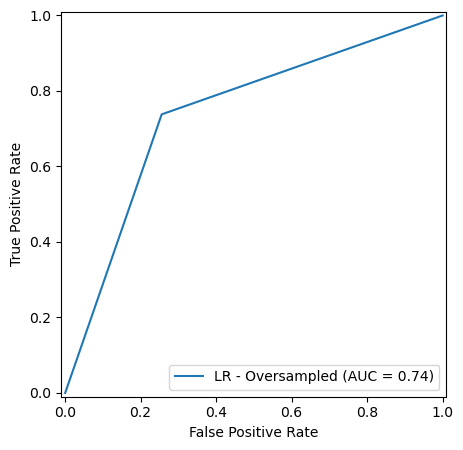

Model Class_weight  AUC-Train  AUC-Test  \
0    LR - Imbalanced          N/A   0.835349  0.500000   
0  LR - Undersampled          N/A   0.854346  0.734204   
0   LR - Oversampled          N/A   0.860441  0.741216   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.01                   0.00              0.957419   
0                    0.85                   0.74              0.813253   
0                    0.83                   0.74              0.784848   

   test_accuracy_score  train_f1_score  test_f1_score  \
0             0.956656            0.01           0.00   
0             0.730650            0.82           0.19   
0             0.744066            0.79           0.20   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                 0.957161                 0.011765       0.000000   
0                 0.785889                 0.791177       0.840580   
0                 0.784578                 0.793055       0.791964   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0       0.058824       0.000000       0.000000       0.000000  
0       0.818182       0.823529       0.685714       0.787879  
0       0.807667       0.782774       0.790879       0.791990

In [81]:
LR_over = LogisticRegression()
         # store_results(name, X_tr, y_tr, X_te, y_te, model, folds, Class_weight="N/A" )
next_model = store_results("LR - Oversampled", X_over_tr, y_over_tr, X_over_te, y_test, \
                           LR_over, 5, Class_weight="N/A" )
All_Models = pd.concat([All_Models, next_model])
All_Models

### Model 4: Logistic Regression classifier based on SMOTE dataset

In [82]:
# Model 4: Logistic Regression classifier based on SMOTE dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote_tr, y_smote_tr = smote.fit_resample(X_train, y_train)
X_smote_tr.shape, y_smote_tr.shape

#scaling the train and test datasets for SMOTE
sc_smote = StandardScaler()
X_smote_tr = sc_smote.fit_transform(X_smote_tr)
X_smote_te = sc_smote.transform(X_test)


Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       927
           1       0.12      0.38      0.18        42

    accuracy                           0.85       969
   macro avg       0.54      0.63      0.55       969
weighted avg       0.93      0.85      0.88       969



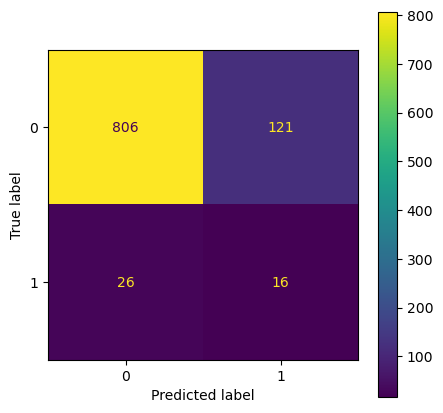

train f1 score:

0.879
test f1 score:

0.1788


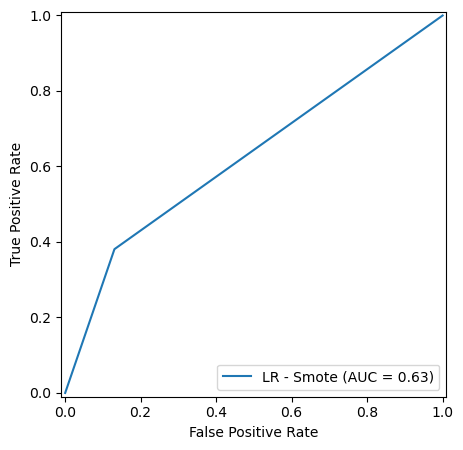

Model Class_weight  AUC-Train  AUC-Test  \
0    LR - Imbalanced          N/A   0.835349  0.500000   
0  LR - Undersampled          N/A   0.854346  0.734204   
0   LR - Oversampled          N/A   0.860441  0.741216   
0         LR - Smote          N/A   0.956961  0.625212   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.01                   0.00              0.957419   
0                    0.85                   0.74              0.813253   
0                    0.83                   0.74              0.784848   
0                    0.88                   0.38              0.879213   

   test_accuracy_score  train_f1_score  test_f1_score  \
0             0.956656            0.01           0.00   
0             0.730650            0.82           0.19   
0             0.744066            0.79           0.20   
0             0.848297            0.88           0.18   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                 0.957161                 0.011765       0.000000   
0                 0.785889                 0.791177       0.840580   
0                 0.784578                 0.793055       0.791964   
0                 0.878541                 0.878107       0.845609   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0       0.058824       0.000000       0.000000       0.000000  
0       0.818182       0.823529       0.685714       0.787879  
0       0.807667       0.782774       0.790879       0.791990  
0       0.892163       0.878113       0.887542       0.887108

In [83]:
LR_smote = LogisticRegression()
         # store_results(name, X_tr, y_tr, X_te, y_te, model, folds, Class_weight="N/A" )
next_model = store_results("LR - Smote", X_smote_tr, y_smote_tr, X_smote_te, y_test, \
                           LR_smote, 5, Class_weight="N/A" )
All_Models = pd.concat([All_Models, next_model])
All_Models

### Model 5: Logistic Regression classifier based on balanced class weights

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       927
           1       0.12      0.86      0.22        42

    accuracy                           0.73       969
   macro avg       0.56      0.79      0.53       969
weighted avg       0.95      0.73      0.81       969



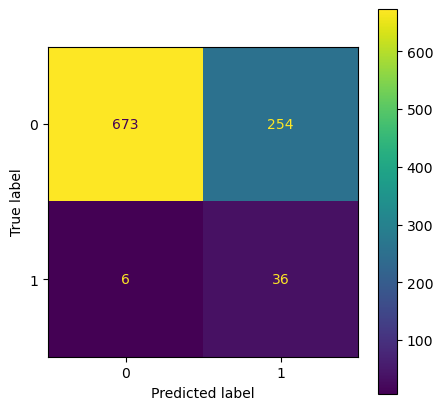

train f1 score:

0.2127
test f1 score:

0.2169


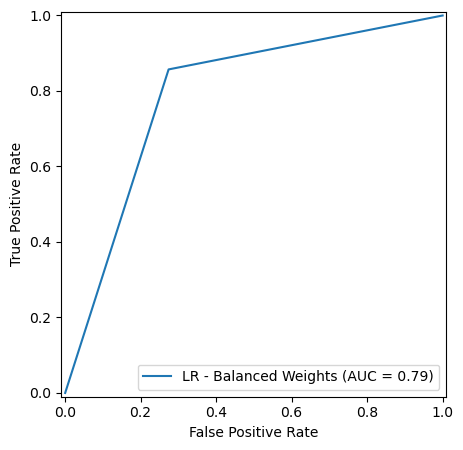

Model Class_weight  AUC-Train  AUC-Test  \
0        LR - Imbalanced          N/A   0.835349  0.500000   
0      LR - Undersampled          N/A   0.854346  0.734204   
0       LR - Oversampled          N/A   0.860441  0.741216   
0             LR - Smote          N/A   0.956961  0.625212   
0  LR - Balanced Weights     Balanced   0.835063  0.791570   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.01                   0.00              0.957419   
0                    0.85                   0.74              0.813253   
0                    0.83                   0.74              0.784848   
0                    0.88                   0.38              0.879213   
0                    0.83                   0.86              0.738323   

   test_accuracy_score  train_f1_score  test_f1_score  \
0             0.956656            0.01           0.00   
0             0.730650            0.82           0.19   
0             0.744066            0.79           0.20   
0             0.848297            0.88           0.18   
0             0.731682            0.21           0.22   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                 0.957161                 0.011765       0.000000   
0                 0.785889                 0.791177       0.840580   
0                 0.784578                 0.793055       0.791964   
0                 0.878541                 0.878107       0.845609   
0                 0.737548                 0.203925       0.208955   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0       0.058824       0.000000       0.000000       0.000000  
0       0.818182       0.823529       0.685714       0.787879  
0       0.807667       0.782774       0.790879       0.791990  
0       0.892163       0.878113       0.887542       0.887108  
0       0.224066       0.190114       0.204918       0.191571

In [84]:
# Model 5: Logistic Regression classifier based on balanced class weights
LR_weights_bal = LogisticRegression(class_weight='balanced')
         # store_results(name, X_tr, y_tr, X_te, y_te, model, folds, Class_weight="N/A" )
next_model = store_results("LR - Balanced Weights", X_imb_tr, y_imb_tr, X_imb_te, y_imb_te, \
                           LR_weights_bal, 5, Class_weight="Balanced" )
All_Models = pd.concat([All_Models, next_model])
All_Models

### Logistic Regression classifier conclusion: 

LR - Imbalanced:
- Test AUC: 0.500 (poor).
- Test Recall: 0.00 (fails to capture positives).
- Test F1: 0.00.
- Cross-validation F1: Poor, indicating poor consistency.

LR - Undersampled:
- Test AUC: 0.734 (decent).
- Test Recall: 0.74.
- Test F1: 0.19 (low F1 despite decent recall).
- CrossVal_Mean(F1): 0.791 (consistent performance).

LR - Oversampled:
- Test AUC: 0.741 (decent).
- Test Recall: 0.74.
- Test F1: 0.20.
- CrossVal_Mean(F1): 0.793 (consistent and stable).

LR - SMOTE:
- Test AUC: 0.622 (lower compared to others).
- Test Recall: 0.38.
- Test F1: 0.17.
- CrossVal_Mean(F1): 0.883 (strong cross-validation F1 but poor recall hurts).

LR - Balanced Weights:
- Test AUC: 0.792 (highest).
- Test Recall: 0.86 (best recall across all models).
- Test F1: 0.22 (better than most others).
- CrossVal_Mean(F1): 0.204 (stable but slightly weaker cross-validation F1).

### FINAL CONCLUSION

The "LR - Balanced Weights" model is the best choice for this dataset based on:<br>
- Highest AUC-Test (0.792).
- Best Test Recall for positive class (0.86).
- Decent Test F1 Score and CrossVal_Mean(F1).<br>
Since objective of this analysis is stroke prediction, capturing true positives is crucial and this model is highly suitable.

### Linear Discriminant Analysis (LDA)

In [85]:
# Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis()
lda.fit(X_train_sc, y_train)

LinearDiscriminantAnalysis()

In [86]:
y_pred_tr= lda.predict(X_train_sc)
y_pred_te=lda.predict(X_test_sc)

print("Linear Discriminant Analysis")
print("* overall accuracy score--Training set*")
print(accuracy_score(y_train, y_pred_tr))
print('confusion matrix=')
print(confusion_matrix(y_train,y_pred_tr))
print('classification report=')
print(classification_report(y_train, y_pred_tr))

print("* overall accuracy score-- Test set*")
print(accuracy_score(y_test, y_pred_te))
print('confusion matrix=')
print(confusion_matrix(y_test,y_pred_te))
print('classification report=')
print(classification_report(y_test, y_pred_te))

Linear Discriminant Analysis
* overall accuracy score--Training set*
0.9478709677419355
confusion matrix=
[[3651   58]
 [ 144   22]]
classification report=
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3709
           1       0.28      0.13      0.18       166

    accuracy                           0.95      3875
   macro avg       0.62      0.56      0.58      3875
weighted avg       0.93      0.95      0.94      3875

* overall accuracy score-- Test set*
0.9432404540763674
confusion matrix=
[[910  17]
 [ 38   4]]
classification report=
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       927
           1       0.19      0.10      0.13        42

    accuracy                           0.94       969
   macro avg       0.58      0.54      0.55       969
weighted avg       0.93      0.94      0.93       969



### ii.	KNN, SVM, RandomForest, AdaBoost, XGBoost: For models other than KNN, tune atleast 3 hyperparameters using GridSearchCV.

### K-NEAREST NEIGHBOR(KNN)


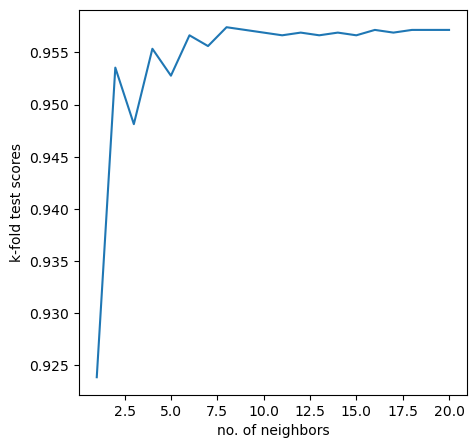

In [87]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

scores=[]
for i in range(1,21,1):
    knn=KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X_train_sc,y_train, cv=5).mean())

plt.plot(range(1,21,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

In [88]:
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')
knn.fit(X_train_sc,y_train)
cross_val_score(knn,X_train_sc,y_train,cv=5).mean()
print("KNN Model(basic) accuracy on test data: ", knn.score(X_test_sc,y_test))

KNN Model(basic) accuracy on test data:  0.957688338493292


In [89]:
y_pred_tr = knn.predict(X_train_sc)
y_pred_te = knn.predict(X_test_sc)

# calculate metrics for training dataset
print('MODEL PERFORMANCE ***TRAINING DATASET***')
print('accuracy_score =', accuracy_score(y_train,y_pred_tr))
print('confusion matrix =')
print(confusion_matrix(y_train,y_pred_tr))
print('classification report =')
print(classification_report(y_train,y_pred_tr))


# calculate metrics for test dataset
print('MODEL PERFORMANCE ***TEST DATASET***')
print('accuracy_score =', accuracy_score(y_test,y_pred_te))
print('confusion matrix =')
print(confusion_matrix(y_test,y_pred_te))
print('classification report =')
print(classification_report(y_test,y_pred_te))

MODEL PERFORMANCE ***TRAINING DATASET***
accuracy_score = 0.9569032258064516
confusion matrix =
[[3703    6]
 [ 161    5]]
classification report =
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3709
           1       0.45      0.03      0.06       166

    accuracy                           0.96      3875
   macro avg       0.71      0.51      0.52      3875
weighted avg       0.94      0.96      0.94      3875

MODEL PERFORMANCE ***TEST DATASET***
accuracy_score = 0.957688338493292
confusion matrix =
[[927   0]
 [ 41   1]]
classification report =
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       927
           1       1.00      0.02      0.05        42

    accuracy                           0.96       969
   macro avg       0.98      0.51      0.51       969
weighted avg       0.96      0.96      0.94       969



In [90]:
results_df=pd.DataFrame()

def classifier_metrics(model,clf, X, y, df):
    ''' Function to calculate & plot model metrics and store results in a dataframe'''
    
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_tr = clf.predict(X_train)

    # calculate metrics for training dataset
    print('MODEL PERFORMANCE  ***TRAINING DATASET***')
    acc_tr = accuracy_score(y_train,y_pred_tr)
    print('accuracy_score =', acc_tr)
    print('confusion matrix =')
    cnf_tr = confusion_matrix(y_train,y_pred_tr)
    print(cnf_tr)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_tr, display_labels=clf.classes_)
    disp.plot()
    print('classification report =')
    print(classification_report(y_train,y_pred_tr))
    
    # calculate metrics for test dataset
    y_pred_te = clf.predict(X_test)
    print('MODEL PERFORMANCE  ***TEST DATASET***')
    acc_te = accuracy_score(y_test,y_pred_te)
    print('accuracy_score =', acc_te)
    print('confusion matrix =')
    cnf_te = confusion_matrix(y_test,y_pred_te)
    print(cnf_te)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cnf_te, display_labels=clf.classes_)
    disp2.plot()
    print('classification report =')
    print(classification_report(y_test,y_pred_te))
    roc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
    results = {"Model": model,
               "Train_Accuracy": [acc_tr],
               "Test_Accuracy": [acc_te],
               "Train_Recall": [recall_score(y_train,y_pred_tr)],
               "Test_Recall": [recall_score(y_test,y_pred_te)],
               "Train_F1":[f1_score (y_train,y_pred_tr)],
               "Test_F1":[f1_score(y_test,y_pred_te)],
               "Train_roc_auc": [roc_auc_score(y_train,clf.predict_proba(X_train)[:,1])],
               "Test_roc_auc": [roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])],
               "Train_Type_II_Error": [1-recall_score(y_train,y_pred_tr)],
               "Test_Type_II_Error": [1-recall_score(y_test,y_pred_te)],
               "Train_Type_I_Error": [cnf_tr[0,1] / cnf_tr[0,:].sum()],
               "Test_Type_I_Error": [cnf_te[0,1] / cnf_te[0,:].sum()]
             
              }
    df = pd.concat([df,pd.DataFrame(results)])
    plt.show()
    return df

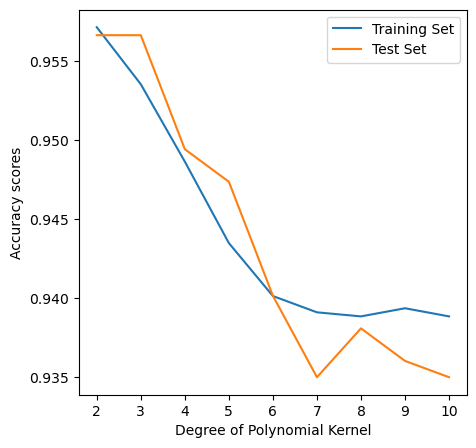

In [91]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

train_scores = []
test_scores = []

for deg in range(2,11):
    clf = SVC(kernel = 'poly', degree = deg)
    train_scores.append(cross_val_score(clf,X_train_sc,y_train,cv=5).mean())
    clf.fit(X_train_sc,y_train)
    test_scores.append(clf.score(X_test_sc, y_test))
    
plt.plot(range(2,11,1),train_scores, label = "Training Set")
plt.plot(range(2,11,1),test_scores, label = "Test Set")
plt.xlabel('Degree of Polynomial Kernel')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()


In [96]:
# SVM
import time
params_grid = {
'kernel': ['linear', 'poly', 'sigmoid','rbf'],
'C'     : [0.1, 1, 10],
'degree': [1,2,3],
'gamma' : [0.03, 'scale', 'auto'],
'probability':[True]
}
start = time.time()
grid = GridSearchCV(SVC(),param_grid=params_grid,cv=5, n_jobs = -1)
grid.fit(X_train_sc,y_train)
end = time.time()
print(f"Time taken: {end-start} seconds")

print("Best Parameters - Grid Search:", grid.best_params_)
print("Best Model Score - Grid Search:", grid.best_score_)

Time taken: 50.362587451934814 seconds
Best Parameters - Grid Search: {'C': 0.1, 'degree': 1, 'gamma': 0.03, 'kernel': 'linear', 'probability': True}
Best Model Score - Grid Search: 0.9571612903225807


MODEL PERFORMANCE  ***TRAINING DATASET***
accuracy_score = 0.960258064516129
confusion matrix =
[[3721    0]
 [ 154    0]]
classification report =
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3721
           1       0.00      0.00      0.00       154

    accuracy                           0.96      3875
   macro avg       0.48      0.50      0.49      3875
weighted avg       0.92      0.96      0.94      3875

MODEL PERFORMANCE  ***TEST DATASET***
accuracy_score = 0.9442724458204335
confusion matrix =
[[915   0]
 [ 54   0]]
classification report =
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       915
           1       0.00      0.00      0.00        54

    accuracy                           0.94       969
   macro avg       0.47      0.50      0.49       969
weighted avg       0.89      0.94      0.92       969



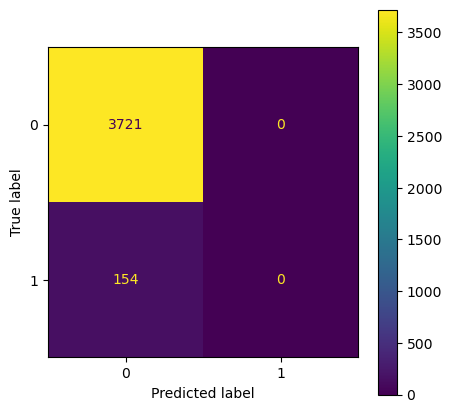

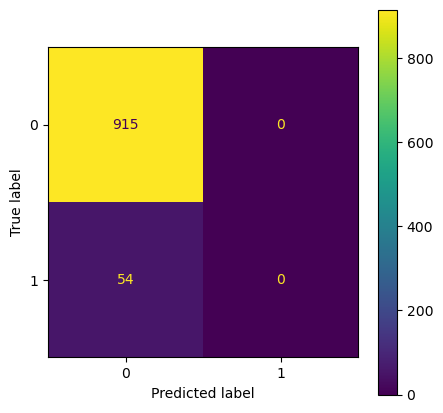

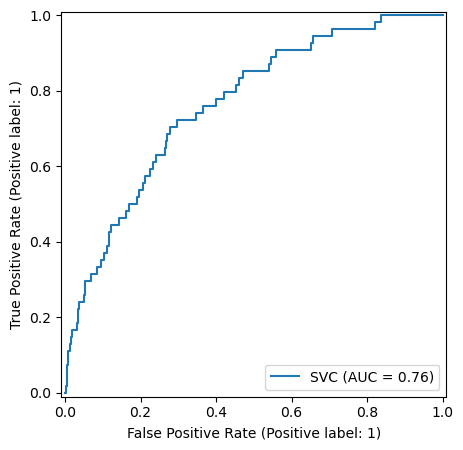

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
0  SVM Model        0.960258       0.944272           0.0          0.0   

   Train_F1  Test_F1  Train_roc_auc  Test_roc_auc  Train_Type_II_Error  \
0       0.0      0.0       0.747397       0.76355                  1.0   

   Test_Type_II_Error  Train_Type_I_Error  Test_Type_I_Error  
0                 1.0                 0.0                0.0

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, f1_score

best_grid = grid.best_estimator_
results_df = classifier_metrics("SVM Model", best_grid, X,y, results_df)
end = time.time()
results_df


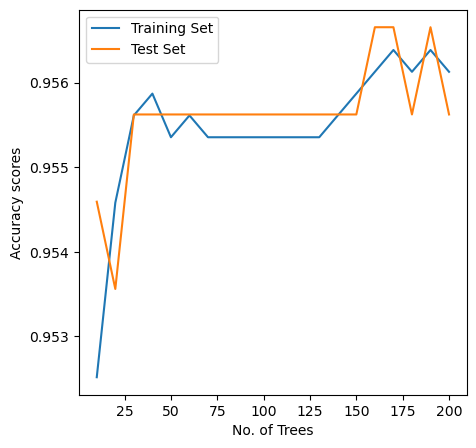

In [98]:
# RandomForest

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

train_scores = []
test_scores = []
for trees in range(10,201,10):
    rf = RandomForestClassifier(n_estimators = trees, random_state=42, n_jobs=-1)
    train_scores.append(cross_val_score(rf,X_train,y_train,cv=5).mean())
    rf.fit(X_train,y_train)
    test_scores.append(rf.score(X_test, y_test))

plt.plot(range(10,201,10),train_scores, label = "Training Set")
plt.plot(range(10,201,10),test_scores, label = "Test Set")
plt.xlabel('No. of Trees')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()


In [99]:
start = time.time()
params = {   'n_estimators': [25,30,40,80],
            'max_depth': [2,4,6,8],
            "max_features": ['sqrt', 'log2', 0.1, 0.4],
          "class_weight": [ "balanced", {0:1, 1:1.5}]
         }
model = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), params,cv=5)
model.fit(X_train,y_train)
end = time.time()
no_of_combinations = 1
for key,value in params.items():
    no_of_combinations *= len(value)

print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)

print("Best Parameters - Grid Search:", model.best_params_)
print("Best Model Score - Grid Search:", model.best_score_)

Time taken by Grid Search over 128 combinations of hyperparameters 126.06764364242554
Best Parameters - Grid Search: {'class_weight': {0: 1, 1: 1.5}, 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 25}
Best Model Score - Grid Search: 0.9571612903225807


MODEL PERFORMANCE  ***TRAINING DATASET***
accuracy_score = 0.960258064516129
confusion matrix =
[[3721    0]
 [ 154    0]]
classification report =
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3721
           1       0.00      0.00      0.00       154

    accuracy                           0.96      3875
   macro avg       0.48      0.50      0.49      3875
weighted avg       0.92      0.96      0.94      3875

MODEL PERFORMANCE  ***TEST DATASET***
accuracy_score = 0.9442724458204335
confusion matrix =
[[915   0]
 [ 54   0]]
classification report =
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       915
           1       0.00      0.00      0.00        54

    accuracy                           0.94       969
   macro avg       0.47      0.50      0.49       969
weighted avg       0.89      0.94      0.92       969



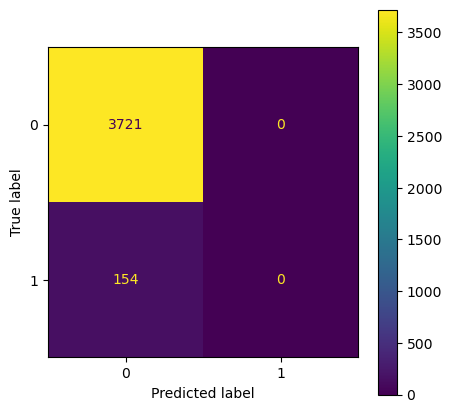

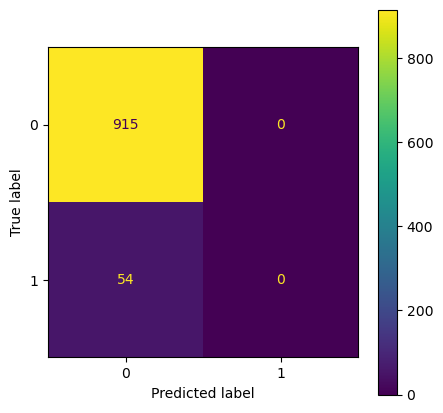

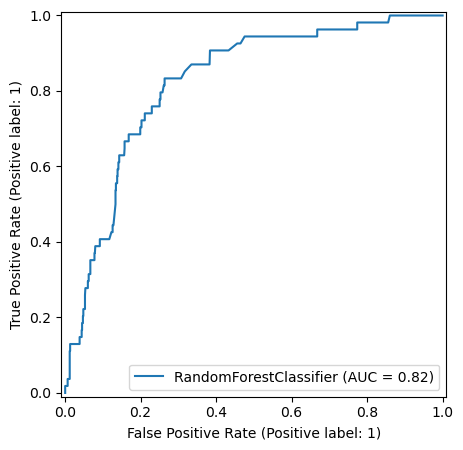

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
0       SVM Model        0.960258       0.944272           0.0          0.0   
0  Tuned RF Model        0.960258       0.944272           0.0          0.0   

   Train_F1  Test_F1  Train_roc_auc  Test_roc_auc  Train_Type_II_Error  \
0       0.0      0.0       0.747397       0.76355                  1.0   
0       0.0      0.0       0.855024       0.82374                  1.0   

   Test_Type_II_Error  Train_Type_I_Error  Test_Type_I_Error  
0                 1.0                 0.0                0.0  
0                 1.0                 0.0                0.0

In [100]:
best_model = model.best_estimator_
results_df = classifier_metrics("Tuned RF Model", best_model, X,y, results_df)
results_df

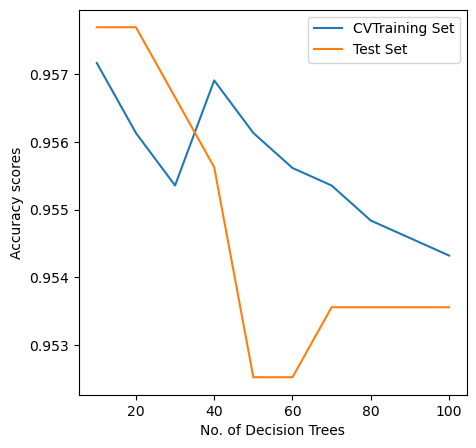

In [101]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
train_scores = []
test_scores = []
for i in range(10,101,10):
    ada = AdaBoostClassifier(n_estimators=i,random_state=42)
    train_scores.append(cross_val_score(ada,X_train,y_train,cv=4).mean())
    ada.fit(X_train,y_train)
    test_scores.append(ada.score(X_test, y_test))   

plt.plot(range(10,101,10),train_scores, label = "CVTraining Set")
plt.plot(range(10,101,10),test_scores, label = "Test Set")
plt.xlabel('No. of Decision Trees')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()



In [102]:
# AdaBoost
start = time.time()
params = {
            'n_estimators': [10, 20, 25, 35, 50,],
            'estimator': [DecisionTreeClassifier(max_depth=1,random_state=0),
                               DecisionTreeClassifier(max_depth=5,random_state=0),
                               DecisionTreeClassifier(max_depth=10,random_state=0)],
            'learning_rate': [0.1, 0.5, 1,10]
        }
model01 = GridSearchCV(AdaBoostClassifier(random_state=1), params,cv=5)
model01.fit(X_train,y_train)
end = time.time()
no_of_combinations = 1
for key,value in params.items():
    no_of_combinations *= len(value)
    
print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print("Best Parameters - Grid Search:", model01.best_params_)
print("Best Model Score - Grid Search:", model01.best_score_)

Time taken by Grid Search over 60 combinations of hyperparameters 93.68762135505676
Best Parameters - Grid Search: {'estimator': DecisionTreeClassifier(max_depth=1, random_state=0), 'learning_rate': 0.5, 'n_estimators': 35}
Best Model Score - Grid Search: 0.9576774193548386


MODEL PERFORMANCE  ***TRAINING DATASET***
accuracy_score = 0.960258064516129
confusion matrix =
[[3721    0]
 [ 154    0]]
classification report =
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3721
           1       0.00      0.00      0.00       154

    accuracy                           0.96      3875
   macro avg       0.48      0.50      0.49      3875
weighted avg       0.92      0.96      0.94      3875

MODEL PERFORMANCE  ***TEST DATASET***
accuracy_score = 0.9442724458204335
confusion matrix =
[[915   0]
 [ 54   0]]
classification report =
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       915
           1       0.00      0.00      0.00        54

    accuracy                           0.94       969
   macro avg       0.47      0.50      0.49       969
weighted avg       0.89      0.94      0.92       969



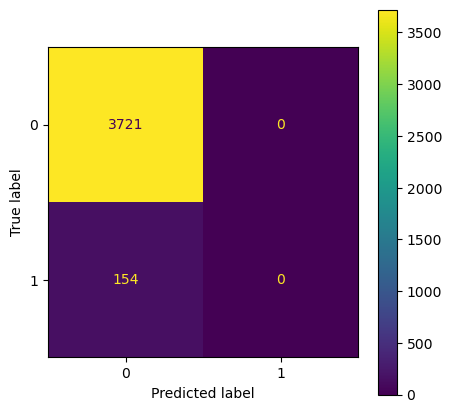

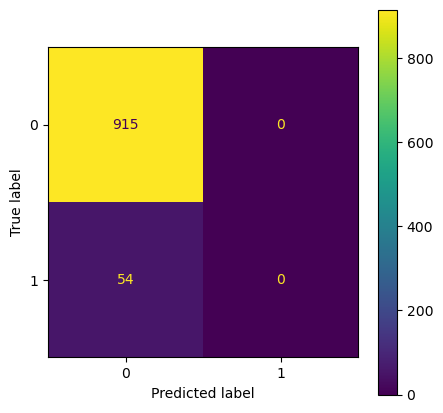

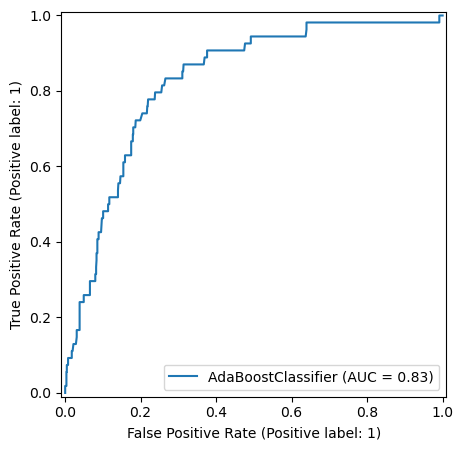

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0             SVM Model        0.960258       0.944272           0.0   
0        Tuned RF Model        0.960258       0.944272           0.0   
0  Tuned AdaBoost Model        0.960258       0.944272           0.0   

   Test_Recall  Train_F1  Test_F1  Train_roc_auc  Test_roc_auc  \
0          0.0       0.0      0.0       0.747397      0.763550   
0          0.0       0.0      0.0       0.855024      0.823740   
0          0.0       0.0      0.0       0.871744      0.826897   

   Train_Type_II_Error  Test_Type_II_Error  Train_Type_I_Error  \
0                  1.0                 1.0                 0.0   
0                  1.0                 1.0                 0.0   
0                  1.0                 1.0                 0.0   

   Test_Type_I_Error  
0                0.0  
0                0.0  
0                0.0

In [103]:
best_model01 = model01.best_estimator_
results_df = classifier_metrics("Tuned AdaBoost Model", best_model01, X,y, results_df)
results_df

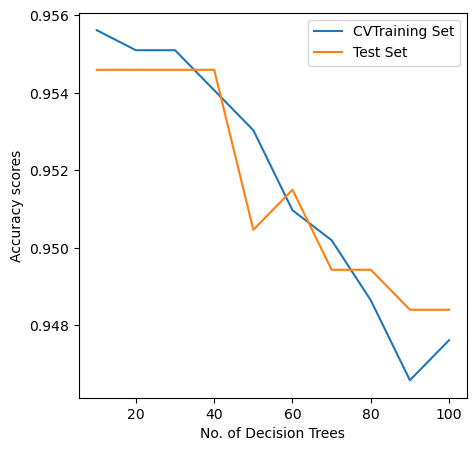

In [104]:
# XGBBoost
from xgboost import XGBClassifier

train_scores = []
test_scores = []
for i in range(10,101,10):
    xgb = XGBClassifier(n_estimators=i,random_state=42, n_jobs=-1)
    train_scores.append(cross_val_score(xgb,X_train,y_train,cv=4).mean())
    xgb.fit(X_train,y_train)
    test_scores.append(xgb.score(X_test, y_test))   

plt.plot(range(10,101,10),train_scores, label = "CVTraining Set")
plt.plot(range(10,101,10),test_scores, label = "Test Set")
plt.xlabel('No. of Decision Trees')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()

In [105]:
# Frist Tuned XGBoost Model
start = time.time()
params = {   'n_estimators': [10,20,40,60,80],
            'max_depth': [2,4,6,8],
           'learning_rate': [0.1, 0.5, 1],
          'colsample_bytree':[0.8,1.0,1.5]
         }

model02 = GridSearchCV(XGBClassifier( random_state=42, n_jobs=-1), params,cv=5)
model02.fit(X_train,y_train)
end = time.time()
no_of_combinations = 1
for key,value in params.items():
    no_of_combinations *= len(value)

print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print("Best Parameters - Grid Search:", model02.best_params_)
print("Best Model Score - Grid Search:", model02.best_score_)


Time taken by Grid Search over 180 combinations of hyperparameters 73.26588678359985
Best Parameters - Grid Search: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10}
Best Model Score - Grid Search: 0.9571612903225807


MODEL PERFORMANCE  ***TRAINING DATASET***
accuracy_score = 0.960258064516129
confusion matrix =
[[3721    0]
 [ 154    0]]
classification report =
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3721
           1       0.00      0.00      0.00       154

    accuracy                           0.96      3875
   macro avg       0.48      0.50      0.49      3875
weighted avg       0.92      0.96      0.94      3875

MODEL PERFORMANCE  ***TEST DATASET***
accuracy_score = 0.9442724458204335
confusion matrix =
[[915   0]
 [ 54   0]]
classification report =
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       915
           1       0.00      0.00      0.00        54

    accuracy                           0.94       969
   macro avg       0.47      0.50      0.49       969
weighted avg       0.89      0.94      0.92       969



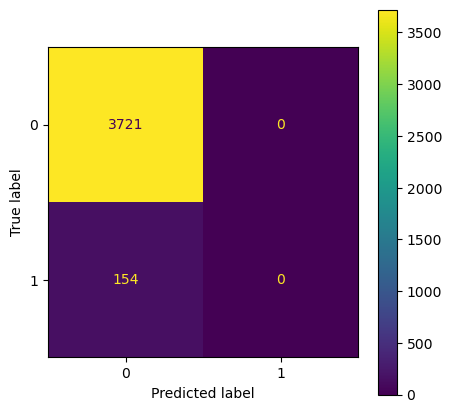

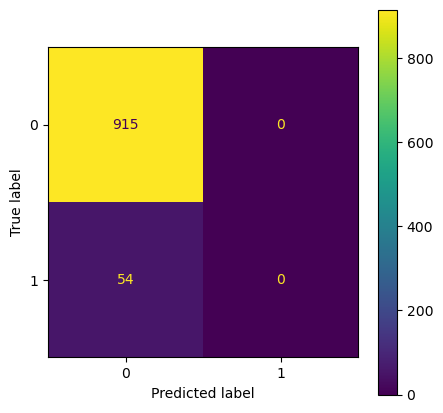

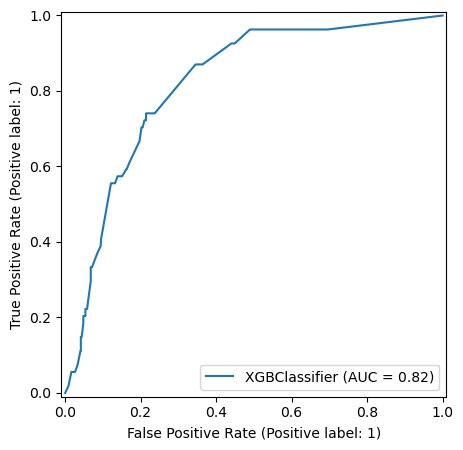

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0                  SVM Model        0.960258       0.944272           0.0   
0             Tuned RF Model        0.960258       0.944272           0.0   
0       Tuned AdaBoost Model        0.960258       0.944272           0.0   
0  Frist Tuned XGBoost Model        0.960258       0.944272           0.0   
0  Frist Tuned XGBoost Model        0.960258       0.944272           0.0   

   Test_Recall  Train_F1  Test_F1  Train_roc_auc  Test_roc_auc  \
0          0.0       0.0      0.0       0.747397      0.763550   
0          0.0       0.0      0.0       0.855024      0.823740   
0          0.0       0.0      0.0       0.871744      0.826897   
0          0.0       0.0      0.0       0.857320      0.820148   
0          0.0       0.0      0.0       0.857320      0.820148   

   Train_Type_II_Error  Test_Type_II_Error  Train_Type_I_Error  \
0                  1.0                 1.0                 0.0   
0                  1.0                 1.0                 0.0   
0                  1.0                 1.0                 0.0   
0                  1.0                 1.0                 0.0   
0                  1.0                 1.0                 0.0   

   Test_Type_I_Error  
0                0.0  
0                0.0  
0                0.0  
0                0.0  
0                0.0

In [174]:
best_model02 = model02.best_estimator_
results_df = classifier_metrics("Frist Tuned XGBoost Model", best_model02, X,y, results_df)
results_df

## 15.	Check for overfitting and take steps to address it

In [177]:
df1 = results_df[['Model', 'Train_Accuracy', 'Test_Accuracy']]
df2 = All_Models[['Model', 'train_accuracy_score', 'test_accuracy_score']]
df2 = df2.rename(columns={"train_accuracy_score": "Train_Accuracy", "test_accuracy_score": "Test_Accuracy"})
df3 = pd.DataFrame({'Model':['LDA'] ,'Train_Accuracy': [f'{accuracy_score(y_train, y_pred_tr):.6f}'], 'Test_Accuracy': [f'{accuracy_score(y_test, y_pred_te):.6f}']})
df4 = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df4 = df4.astype({'Train_Accuracy': 'float64', 'Test_Accuracy': 'float64'})
df4['Overfitting'] = df4.apply(lambda row: 'Yes' if (row['Train_Accuracy'] - row['Test_Accuracy']) > 0.05 else 'No', axis=1)
df4 = df4.sort_values(by='Test_Accuracy', ascending=False)
df4

Model  Train_Accuracy  Test_Accuracy Overfitting
10                        LDA        0.956903       0.957688          No
5             LR - Imbalanced        0.957419       0.956656          No
0                   SVM Model        0.960258       0.944272          No
1              Tuned RF Model        0.960258       0.944272          No
2        Tuned AdaBoost Model        0.960258       0.944272          No
3   Frist Tuned XGBoost Model        0.960258       0.944272          No
4   Frist Tuned XGBoost Model        0.960258       0.944272          No
8                  LR - Smote        0.879213       0.848297          No
7            LR - Oversampled        0.784848       0.744066          No
9       LR - Balanced Weights        0.738323       0.731682          No
6           LR - Undersampled        0.813253       0.730650         Yes

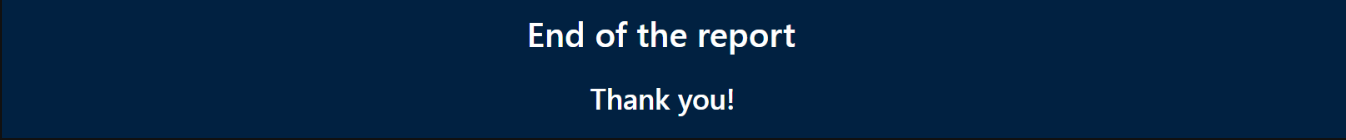